Looking at a dynamic programming solution for the case of ["next card bet"](https://github.com/WinVector/Examples/blob/main/puzzles/next_card_bet/Kelly_cant_fail.ipynb) with invisible stakes.

In [1]:
from IPython.display import display
from scipy.special import comb
import numpy as np
import pandas as pd
import plotnine
from plotnine import *
from card_count_fns import (
    basic_bet_strategy,
    dynprog_bet_strategy,
    find_worst_deck,
    k_array_with_t_true,
    minmax_bet_value,
    mk_traj_frame,
    run_bets,
    run_bets_int,
    theoretical_payout,
    )
plotnine.options.figure_size = (8, 6)

In [2]:
rng = np.random.default_rng(2024)

In [3]:
initial_stake = 100
n_cards_per_color = 26


In [4]:
n_possible_decks = comb(2 * n_cards_per_color, n_cards_per_color, exact=True)

n_possible_decks

495918532948104

In [5]:
np.log(n_possible_decks) / np.log(10)

14.69541033859298

In [6]:
ideal_return = theoretical_payout(n_cards_per_color, n_cards_per_color)

ideal_return

9.08132954942779

In [7]:
bad_basic_deck_is_red, bad_basic_value, bad_basic_branches = find_worst_deck(
    initial_stake, n_cards_per_color, n_cards_per_color, 
    satiation_point=None, bet_strategy=basic_bet_strategy)

bad_basic_value

2

In [8]:
bad_basic_branches

110307377676

In [9]:
bad_basic_branches / n_possible_decks

0.00022243044037949526

In [10]:
bad_basic_deck_is_red

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False])

In [11]:
run_bets_int(
        bad_basic_deck_is_red,
        initial_stake=initial_stake,
        satiation_point=None,
        bet_strategy=basic_bet_strategy,
    )

(0.02,
 array([100, 100,  98,  94,  88,  81,  72,  63,  53,  43,  34,  26,  19,
         13,   9,   6,   4,   2,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          2]))

In [12]:
run_bets_int(
        bad_basic_deck_is_red,
        initial_stake=1000000000,
        satiation_point=None,
        bet_strategy=basic_bet_strategy,
    )

(9.082765038,
 array([1000000000, 1000000000,  980392158,  941176473,  883553425,
         809923974,  723761850,  629358131,  531457979,  434829256,
         343818483,  261956941,  191675812,  134173068,   89448713,
          56493925,   33590984,   18661658,    9597425,    4516435,
           1916063,     718524,     231782,      61809,      12788,
              1827,       3519,       6767,      12993,      24903,
             47641,      90951,     173240,     329156,     623664,
           1178032,    2217472,    4157760,    7761152,   14413568,
          26609664,   48784384,   88698879,  159657981,  283836409,
         496713715,  851509224, 1419182039, 2270691261, 3406036890,
        4541382519, 4541382519, 9082765038]))

In [13]:
satiation_point = int(np.ceil(ideal_return * initial_stake))

In [14]:

# compute dynamic programming minmax value
min_payoff_constrained = minmax_bet_value(
    initial_stake, n_cards_per_color, n_cards_per_color, satiation_point,
)
min_empirical_return_rate = min_payoff_constrained / initial_stake

min_empirical_return_rate

8.08

In [15]:
dyn_prob_on_bad_basic_deck = run_bets_int(
        bad_basic_deck_is_red,
        initial_stake=initial_stake,
        satiation_point=satiation_point,
        bet_strategy=dynprog_bet_strategy,
    )

dyn_prob_on_bad_basic_deck

(60747.52,
 array([    100,     100,      98,      94,      89,      82,      74,
             66,      57,      48,      40,      33,      26,      20,
             16,      13,      11,      10,       9,       8,       7,
              6,       5,       4,       3,       2,       3,       5,
              9,      17,      32,      61,     116,     220,     417,
            788,    1483,    2781,    5191,    9640,   17797,   32628,
          59324,  106783,  189836,  332213,  569508,  949180, 1518688,
        2278032, 3037376, 3037376, 6074752]))

In [16]:
dyn_prob_on_bad_basic_deck[0] / n_possible_decks

1.2249495827242456e-10

In [17]:
bad_dynprog_deck_is_red, bad_dynprog_deck_value, bad_dynprog_branches = find_worst_deck(
    initial_stake, n_cards_per_color, n_cards_per_color,
    satiation_point=satiation_point, bet_strategy=dynprog_bet_strategy)

bad_dynprog_deck_value

808

In [18]:
bad_dynprog_branches

302400

In [19]:
bad_dynprog_branches / n_possible_decks

6.09777574155804e-10

In [20]:
bad_dynprog_deck_is_red

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
        True, False,  True,  True, False, False, False])

In [21]:
run_bets_int(
        bad_dynprog_deck_is_red,
        initial_stake=initial_stake,
        satiation_point=satiation_point,
        bet_strategy=basic_bet_strategy,
    )

(8.96,
 array([100, 100,  98,  94,  88,  81,  72,  81,  90,  98, 105, 100,  93,
         84,  73,  85,  96, 107,  98, 110, 100, 112, 101, 114, 102, 117,
        104, 120, 106,  88, 107, 126, 108, 130, 151, 134, 158, 138, 110,
        141, 174, 145, 105, 147, 196, 245, 210, 280, 224, 112, 224, 448,
        896]))

In [22]:
run_bets_int(
        bad_dynprog_deck_is_red,
        initial_stake=initial_stake,
        satiation_point=satiation_point,
        bet_strategy=dynprog_bet_strategy,
    )

(8.08,
 array([100, 100,  98,  94,  89,  82,  74,  82,  90,  97, 103,  98,  91,
         83,  73,  83,  93, 102,  94, 104,  95, 106,  96, 108,  97, 110,
         98, 112,  99,  83, 100, 117, 101, 120, 138, 123, 144, 126, 101,
        129, 158, 132,  96, 134, 178, 222, 190, 253, 202, 101, 202, 404,
        808]))

In [23]:

decks = [k_array_with_t_true(2 * n_cards_per_color, n_cards_per_color, rng=rng) for _ in range(10000)]


In [24]:
payoffs_basic = [
    run_bets_int(
        deck,
        initial_stake=initial_stake,
        satiation_point=None,
        bet_strategy=basic_bet_strategy,
    )[0]
    for deck in decks
]

(np.min(payoffs_basic), np.mean(payoffs_basic), np.max(payoffs_basic))

(0.02, 9.083892, 40.96)

In [25]:
assert np.min(payoffs_basic) > 0

In [26]:
np.std(payoffs_basic)

0.4642585188620667

In [27]:
plt_frame_basic = pd.DataFrame({"return": payoffs_basic, "strategy": "basic"})

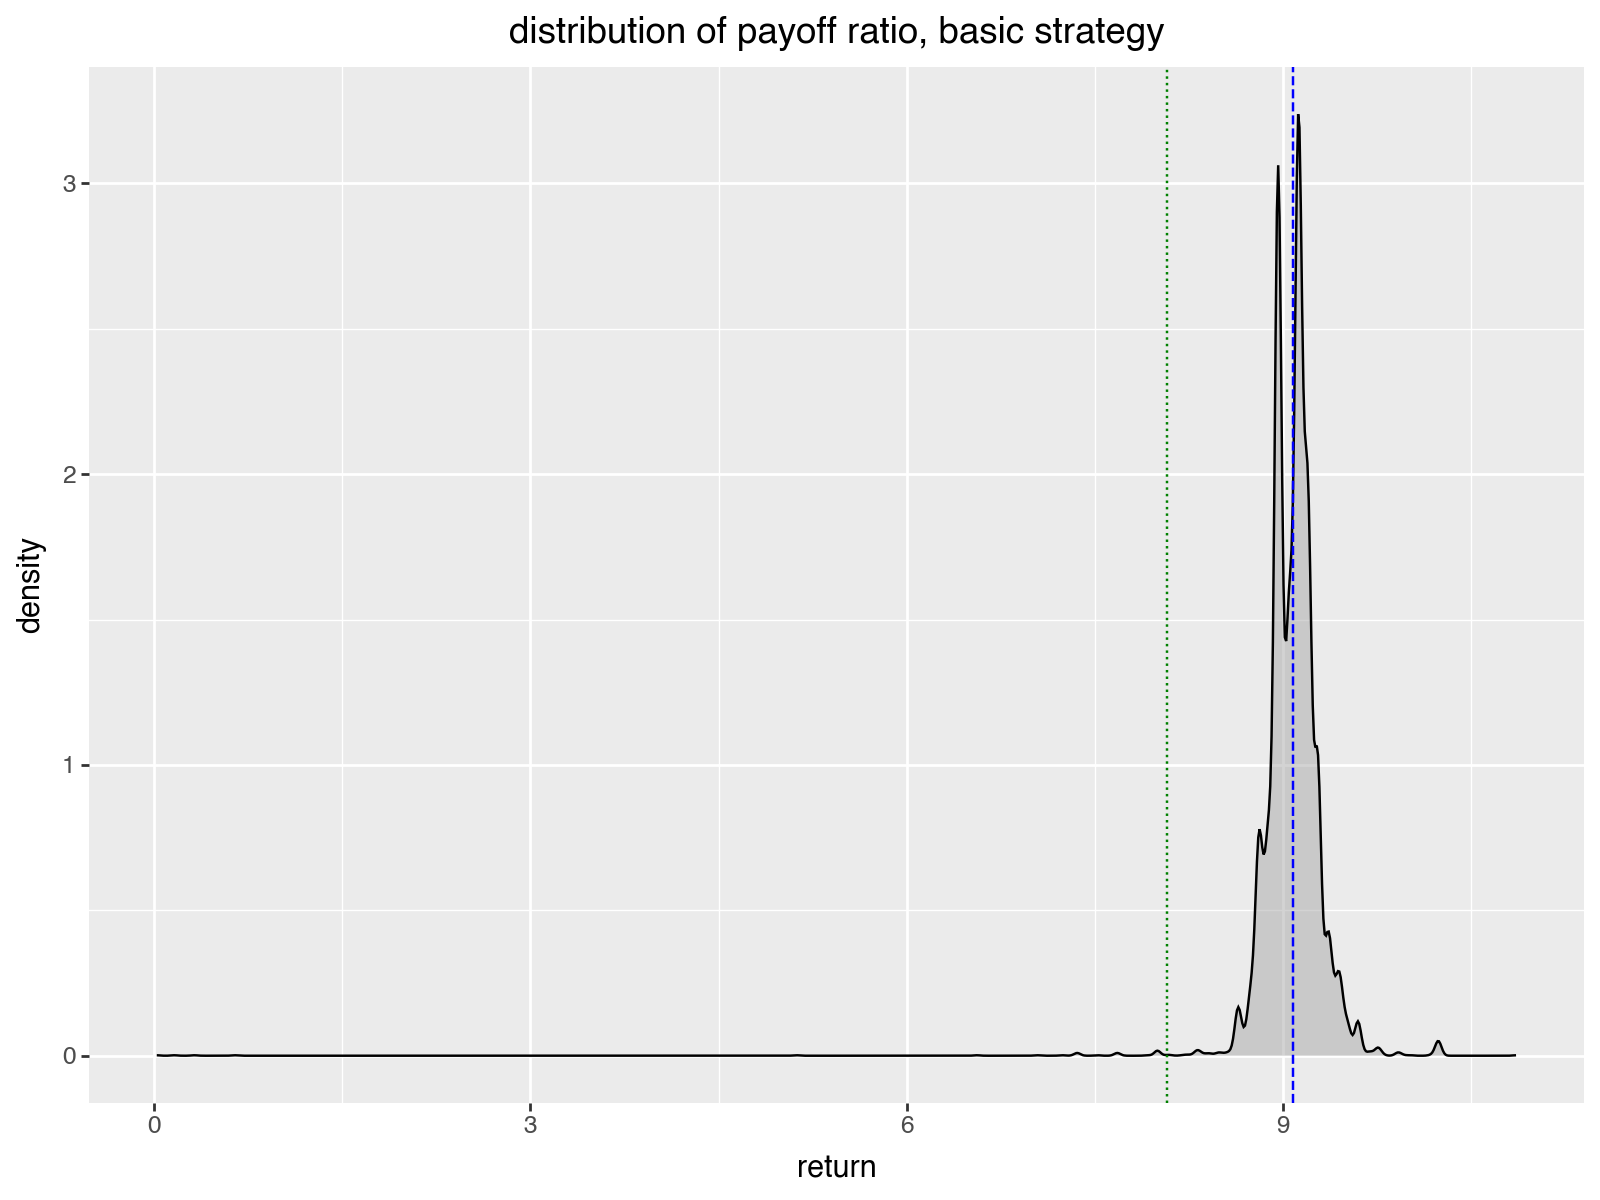

In [28]:

(
    ggplot(
        data=plt_frame_basic.loc[plt_frame_basic['return'] <= 2 * ideal_return, :], 
        mapping=aes(x="return"))
    + geom_density(fill="darkgray", alpha=0.5, trim=True)
    + geom_vline(xintercept=min_empirical_return_rate, color="green", linetype="dotted")
    + geom_vline(xintercept=ideal_return, color="blue", linetype="--")
    + ggtitle("distribution of payoff ratio, basic strategy")
)

In [29]:
# partial moment stats in the spirit of https://www.scirp.org/journal/paperinformation?paperid=72243
def partial_moment_stats(v, what: str):
    v = np.array(v)
    v_median = np.median(v)
    v_diffs = v - v_median
    return pd.DataFrame({
        'what': [what],
        'min': [np.min(v)],
        'max': [np.max(v)],
        'median': [v_median],
        'mean': [np.mean(v)],
        'std': [np.std(v)],
        'count': [len(v)],
        'LPM1': [np.mean(np.abs(np.minimum(0, v_diffs)))],
        'UPM1': [np.mean(np.abs(np.maximum(0, v_diffs)))],
        'Risk1': [np.mean(np.abs(np.maximum(0, v_diffs))) / 
                 np.mean(np.abs(np.minimum(0, v_diffs)))],
        'LMP2': [np.sqrt(np.mean(np.abs(np.minimum(0, v_diffs))**2))],
        'UPM2': [np.sqrt(np.mean(np.abs(np.maximum(0, v_diffs))**2))],
        'Risk2': [np.sqrt(np.mean(np.abs(np.maximum(0, v_diffs))**2)) / 
                 np.sqrt(np.mean(np.abs(np.minimum(0, v_diffs))**2))],
        })

In [30]:
basic_stats = partial_moment_stats(plt_frame_basic['return'], 'basic')

basic_stats

what   min    max  median      mean       std  count      LPM1      UPM1  \
0  basic  0.02  40.96     9.1  9.083892  0.464259  10000  0.085106  0.068998   

     Risk1      LMP2      UPM2     Risk2  
0  0.81073  0.238563  0.398601  1.670841

In [31]:
payoffs_dynprog = [
    run_bets_int(
        deck,
        initial_stake=initial_stake,
        satiation_point=satiation_point,
        bet_strategy=dynprog_bet_strategy,
    )[0]
    for deck in decks
]
assert np.min(payoffs_dynprog) >= min_empirical_return_rate

(np.min(payoffs_dynprog), np.mean(payoffs_dynprog), np.max(payoffs_dynprog))

(8.26, 9.075486, 40.96)

In [32]:
np.std(payoffs_dynprog)

0.6745429147237408

In [33]:
plt_frame_dynprog = pd.DataFrame({"return": payoffs_dynprog, "strategy": "dynprog"})


In [34]:
dynprog_stats = partial_moment_stats(plt_frame_dynprog['return'], 'dynprog')

dynprog_stats

what   min    max  median      mean       std  count      LPM1  \
0  dynprog  8.26  40.96    8.98  9.075486  0.674543  10000  0.059752   

       UPM1     Risk1      LMP2      UPM2     Risk2  
0  0.155238  2.598039  0.112234  0.671959  5.987125

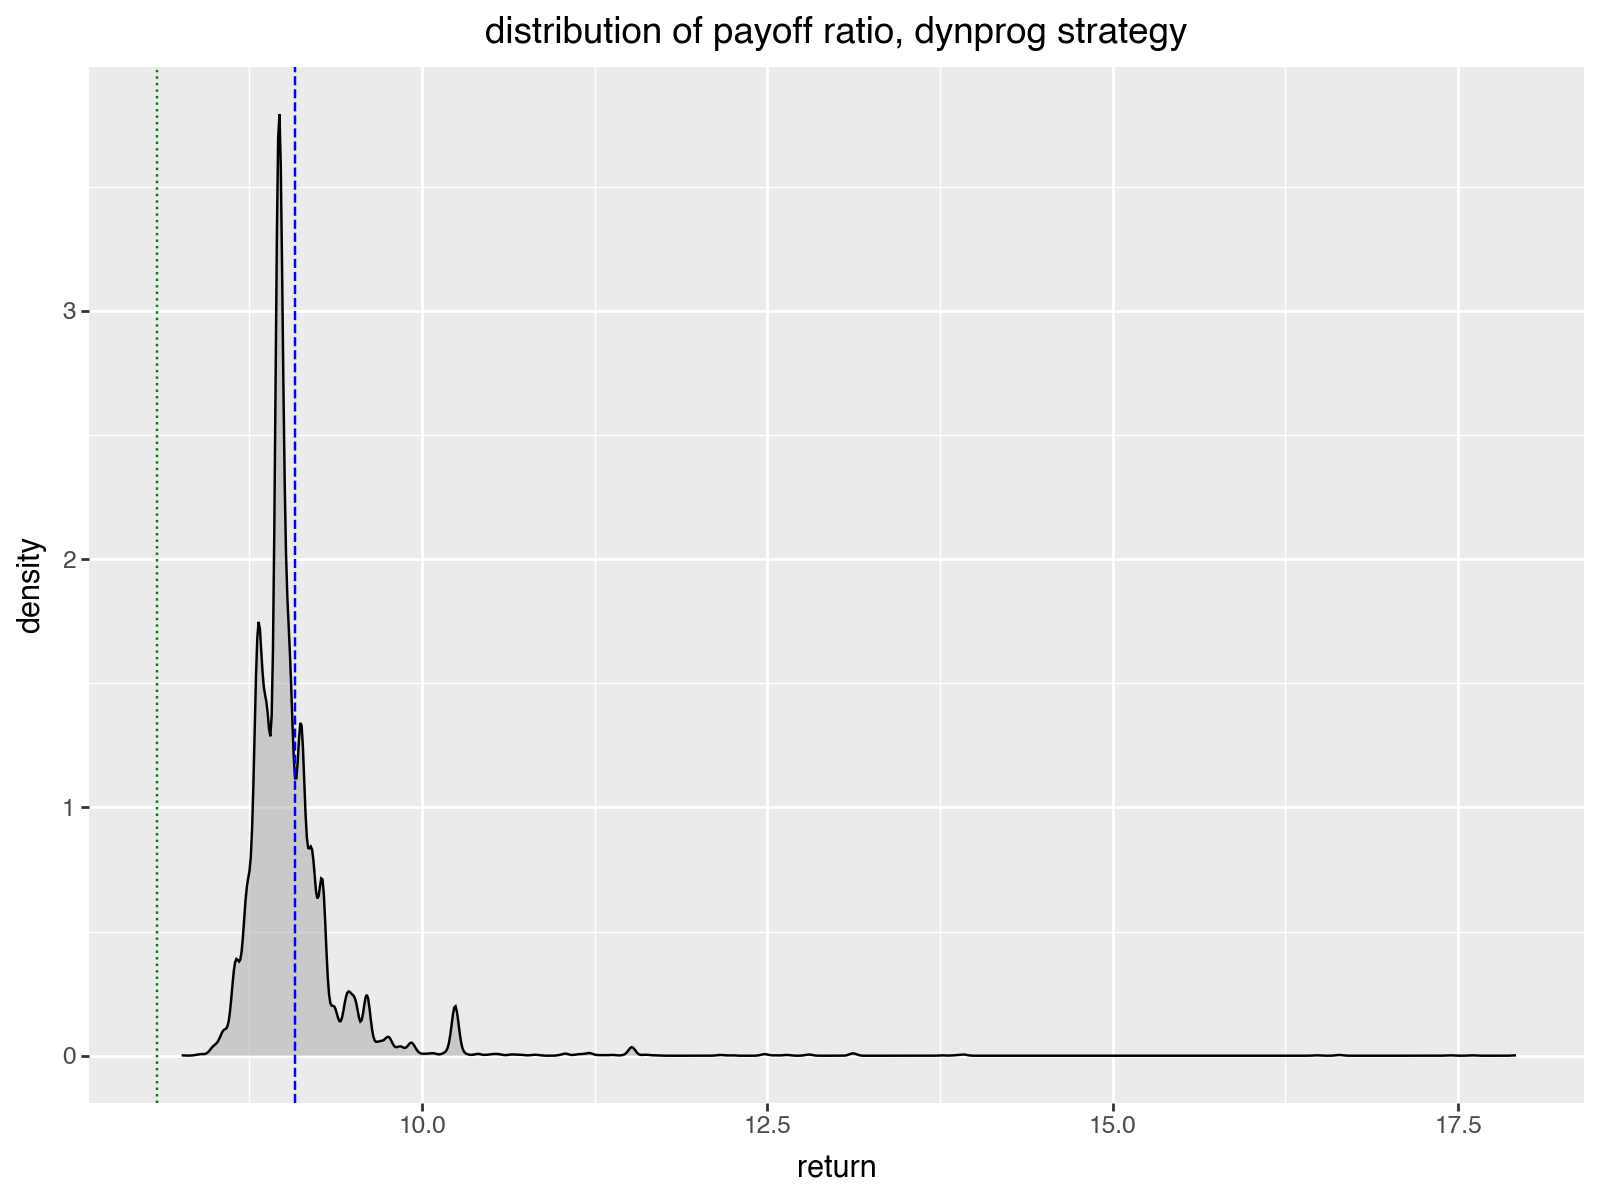

In [35]:
(
    ggplot(
        data=plt_frame_dynprog.loc[plt_frame_dynprog['return'] <= 2 * ideal_return, :],  
        mapping=aes(x="return"))
    + geom_density(fill="darkgray", alpha=0.5, trim=True)
    + geom_vline(xintercept=min_empirical_return_rate, color="green", linetype="dotted")
    + geom_vline(xintercept=ideal_return, color="blue", linetype="--")
    + ggtitle("distribution of payoff ratio, dynprog strategy")
)

In [36]:
plt_frame_both = pd.concat(
    [
        plt_frame_basic,
        plt_frame_dynprog,
    ],
    ignore_index=True,
)
plt_lower_bound = min_empirical_return_rate / 2
plt_upper_bound = 2 * ideal_return

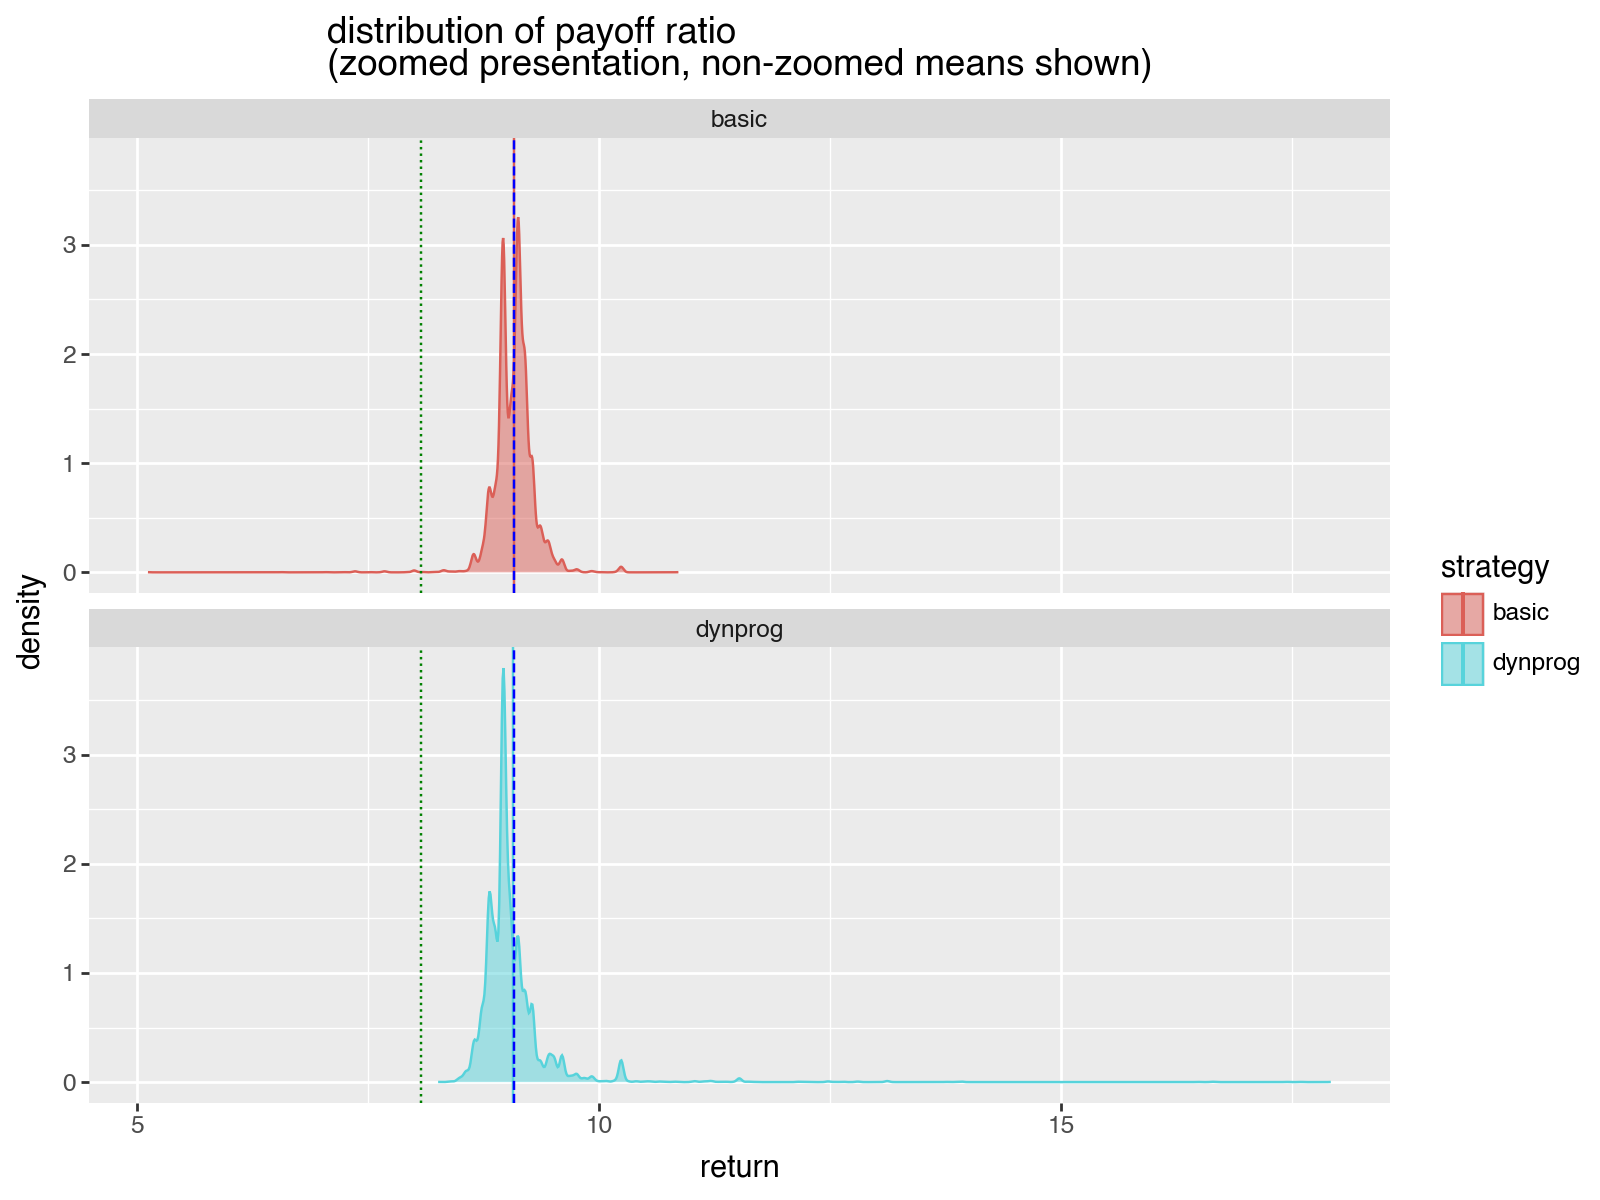

In [37]:
means_both = (
    plt_frame_both.groupby(["strategy"]).mean().reset_index(drop=False, inplace=False)
)
(
    ggplot(
        data=plt_frame_both.loc[
            (plt_frame_both["return"] >= plt_lower_bound)
            & (plt_frame_both["return"] <= plt_upper_bound),
            :,
        ],
        mapping=aes(x="return", color="strategy", fill="strategy"),
    )
    + geom_density(alpha=0.5, trim=True)
    + geom_vline(data=means_both, mapping=aes(xintercept="return", color="strategy"))
    + geom_vline(xintercept=min_empirical_return_rate, color="green", linetype="dotted")
    + geom_vline(xintercept=ideal_return, color="blue", linetype="--")
    + facet_wrap("strategy", ncol=1)
    + ggtitle(
        "distribution of payoff ratio\n(zoomed presentation, non-zoomed means shown)"
    )
)

In [38]:
compare_frame = pd.DataFrame({
        "basic": payoffs_basic,
        "dynprog": payoffs_dynprog,
    })
compare_frame['dynprog-basic'] = compare_frame['dynprog'] - compare_frame['basic']
compare_frame['basic-dynprog'] = compare_frame['basic'] - compare_frame['dynprog']

In [39]:
compare_stats1 = partial_moment_stats(compare_frame['dynprog-basic'], 'dynprog-basic')
compare_stats2 = partial_moment_stats(compare_frame['basic-dynprog'], 'basic-dynprog')

In [40]:
# overall stats
pd.concat([basic_stats, dynprog_stats, compare_stats1, compare_stats2], ignore_index=True)

what    min    max  median      mean       std  count      LPM1  \
0          basic   0.02  40.96    9.10  9.083892  0.464259  10000  0.085106   
1        dynprog   8.26  40.96    8.98  9.075486  0.674543  10000  0.059752   
2  dynprog-basic  -1.04  20.48   -0.08 -0.008406  0.624975  10000  0.094032   
3  basic-dynprog -20.48   1.04    0.08  0.008406  0.624975  10000  0.165626   

       UPM1     Risk1      LMP2      UPM2     Risk2  
0  0.068998  0.810730  0.238563  0.398601  1.670841  
1  0.155238  2.598039  0.112234  0.671959  5.987125  
2  0.165626  1.761379  0.163345  0.607485  3.719033  
3  0.094032  0.567737  0.607485  0.163345  0.268887

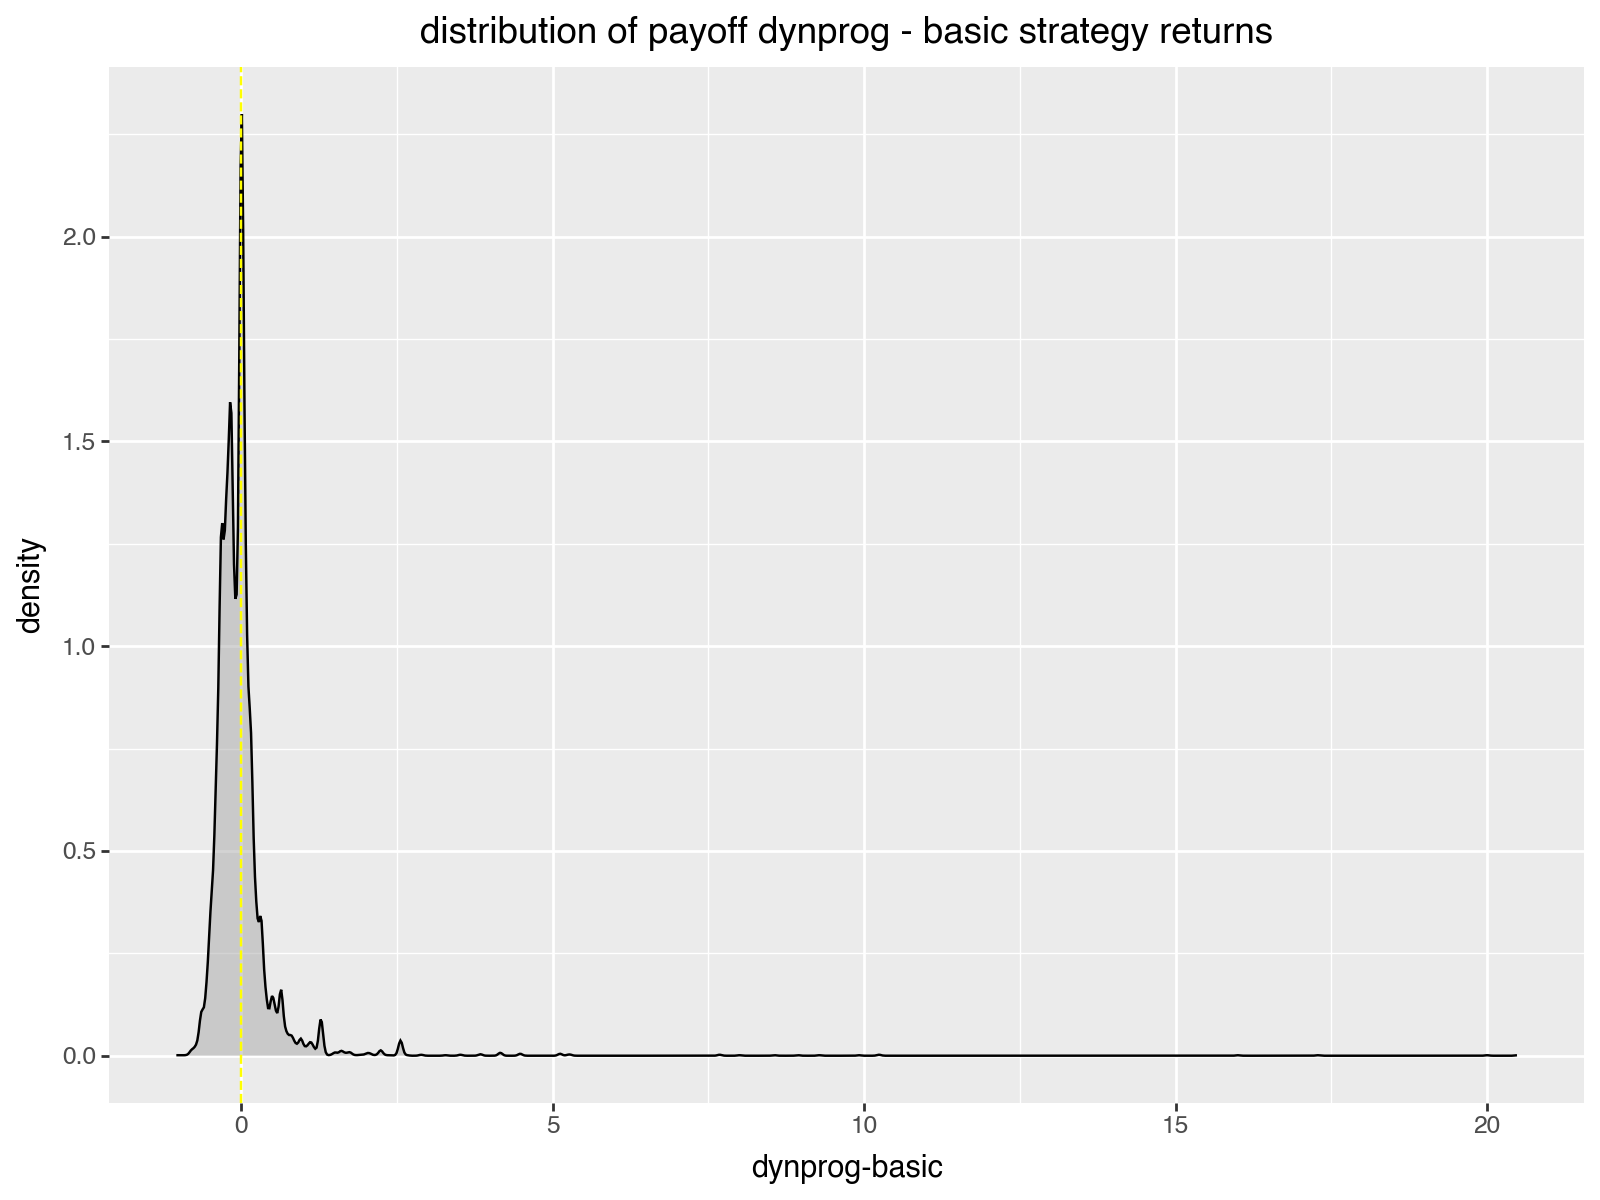

In [41]:
(
    ggplot(
        data=compare_frame,  
        mapping=aes(x="dynprog-basic"))
    + geom_density(fill="darkgray", alpha=0.5, trim=True)
    + geom_vline(xintercept=0, color="yellow", linetype="--")
    + ggtitle("distribution of payoff dynprog - basic strategy returns")
)

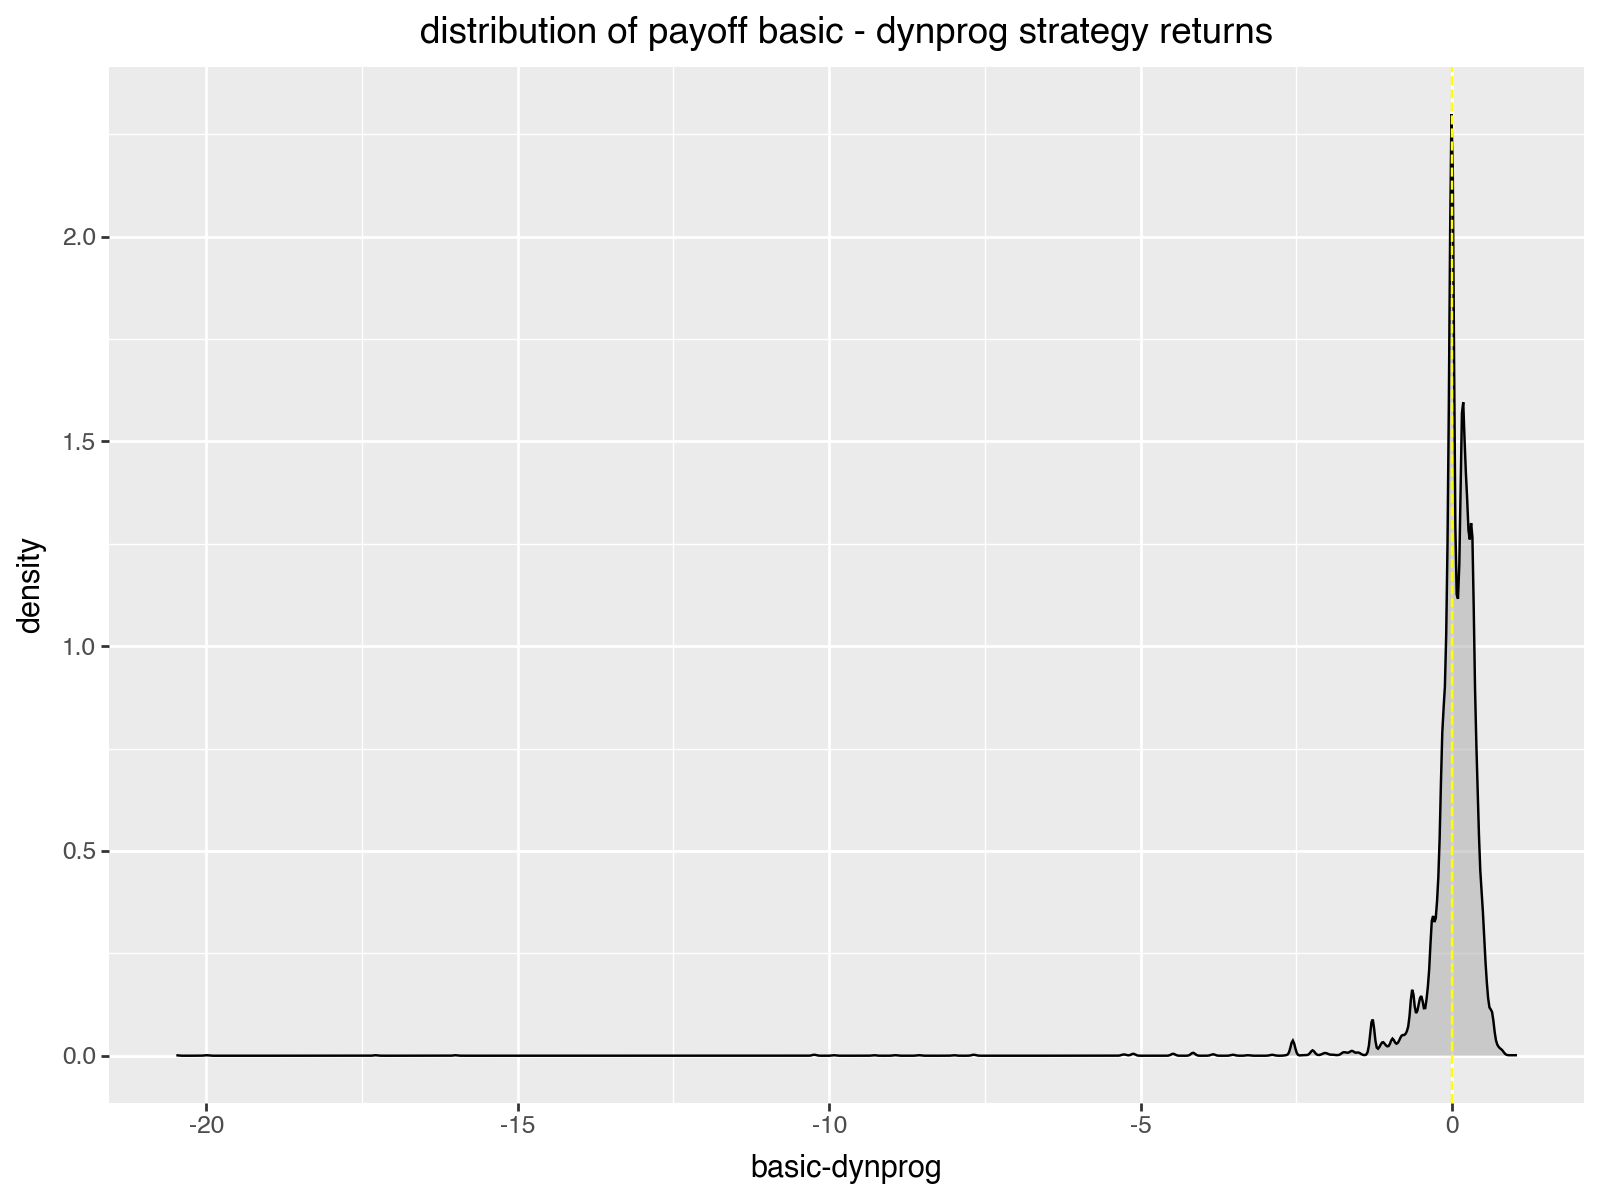

In [42]:
(
    ggplot(
        data=compare_frame,  
        mapping=aes(x="basic-dynprog"))
    + geom_density(fill="darkgray", alpha=0.5, trim=True)
    + geom_vline(xintercept=0, color="yellow", linetype="--")
    + ggtitle("distribution of payoff basic - dynprog strategy returns")
)

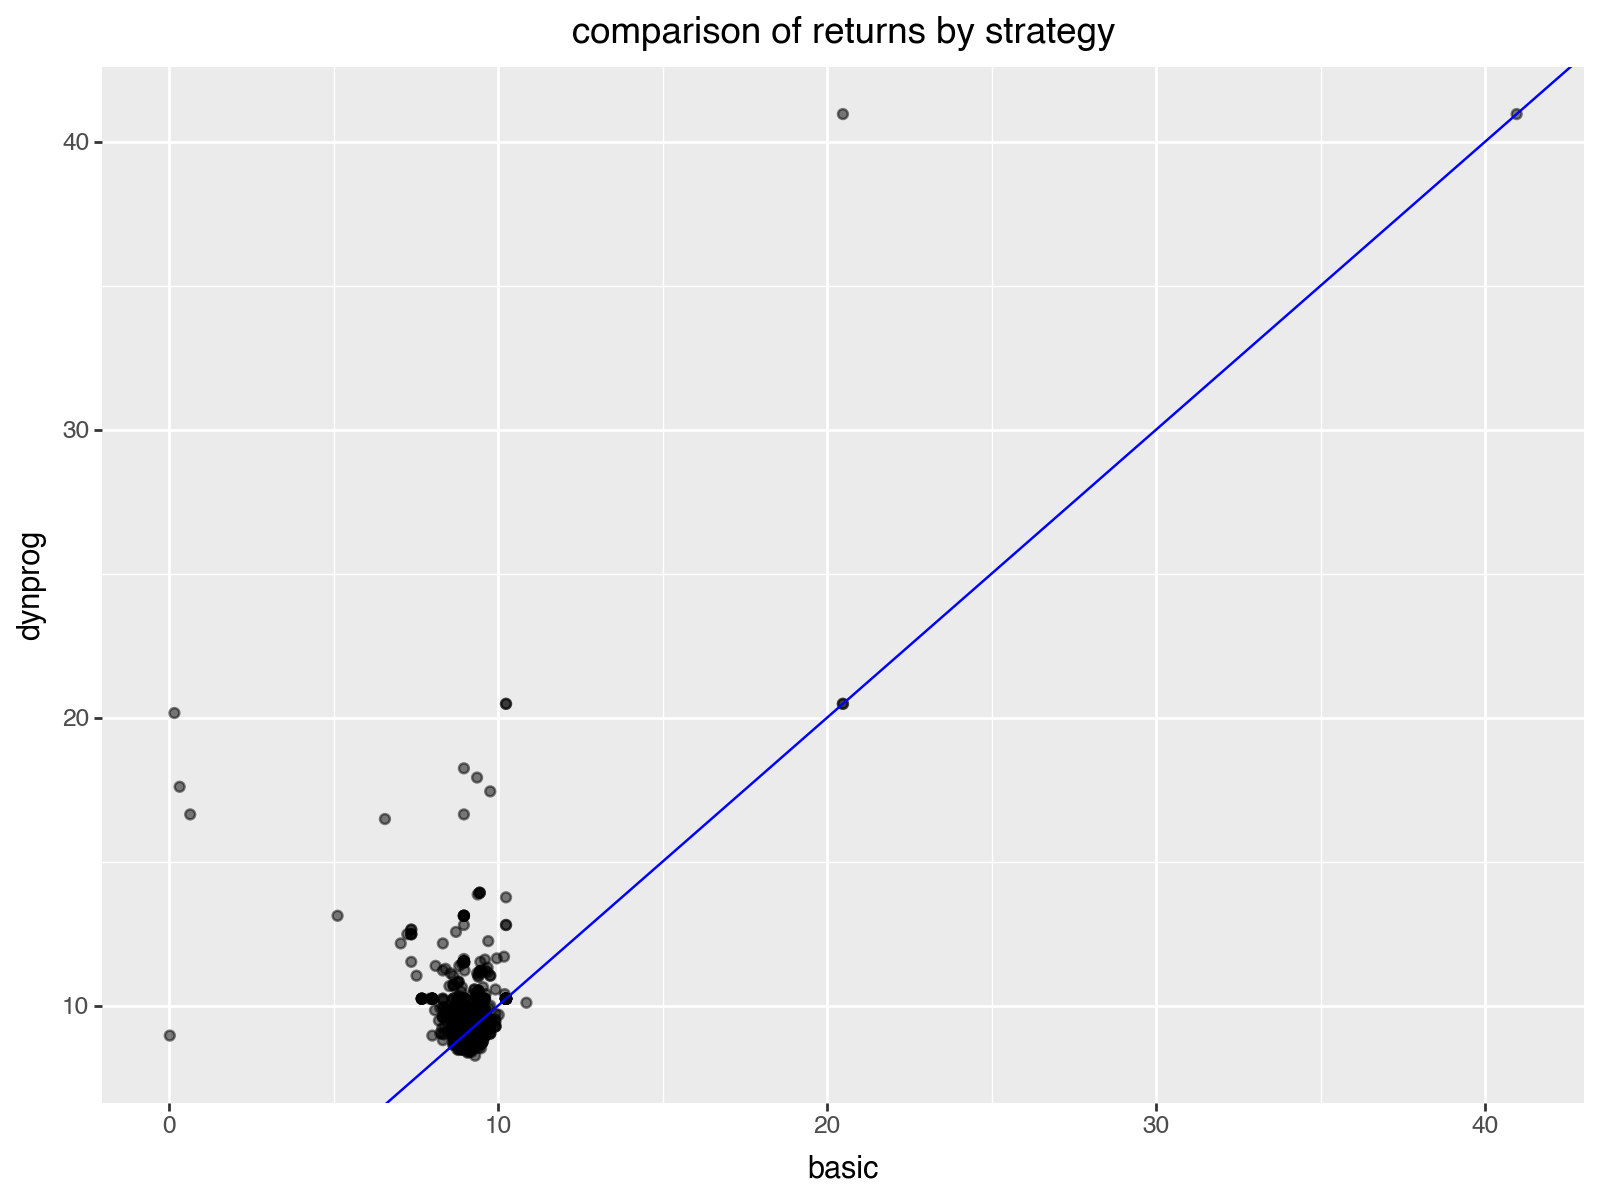

In [43]:
(
    ggplot(data=compare_frame, mapping=aes(x="basic", y="dynprog"))
    + geom_point(alpha=0.5)
    + geom_abline(intercept=0, slope=1, color="blue")
    + ggtitle("comparison of returns by strategy")
)

In [44]:
trajectories = [
    mk_traj_frame(
        i,
        bet_strategy=basic_bet_strategy,
        initial_stake=initial_stake,
        decks=decks,
        satiation_point=satiation_point,
    )
    for i in range(len(decks))
] + [
    mk_traj_frame(
        i,
        bet_strategy=dynprog_bet_strategy,
        initial_stake=initial_stake,
        decks=decks,
        satiation_point=satiation_point,
    )
    for i in range(len(decks))
]
trajectories = pd.concat(trajectories, ignore_index=True)

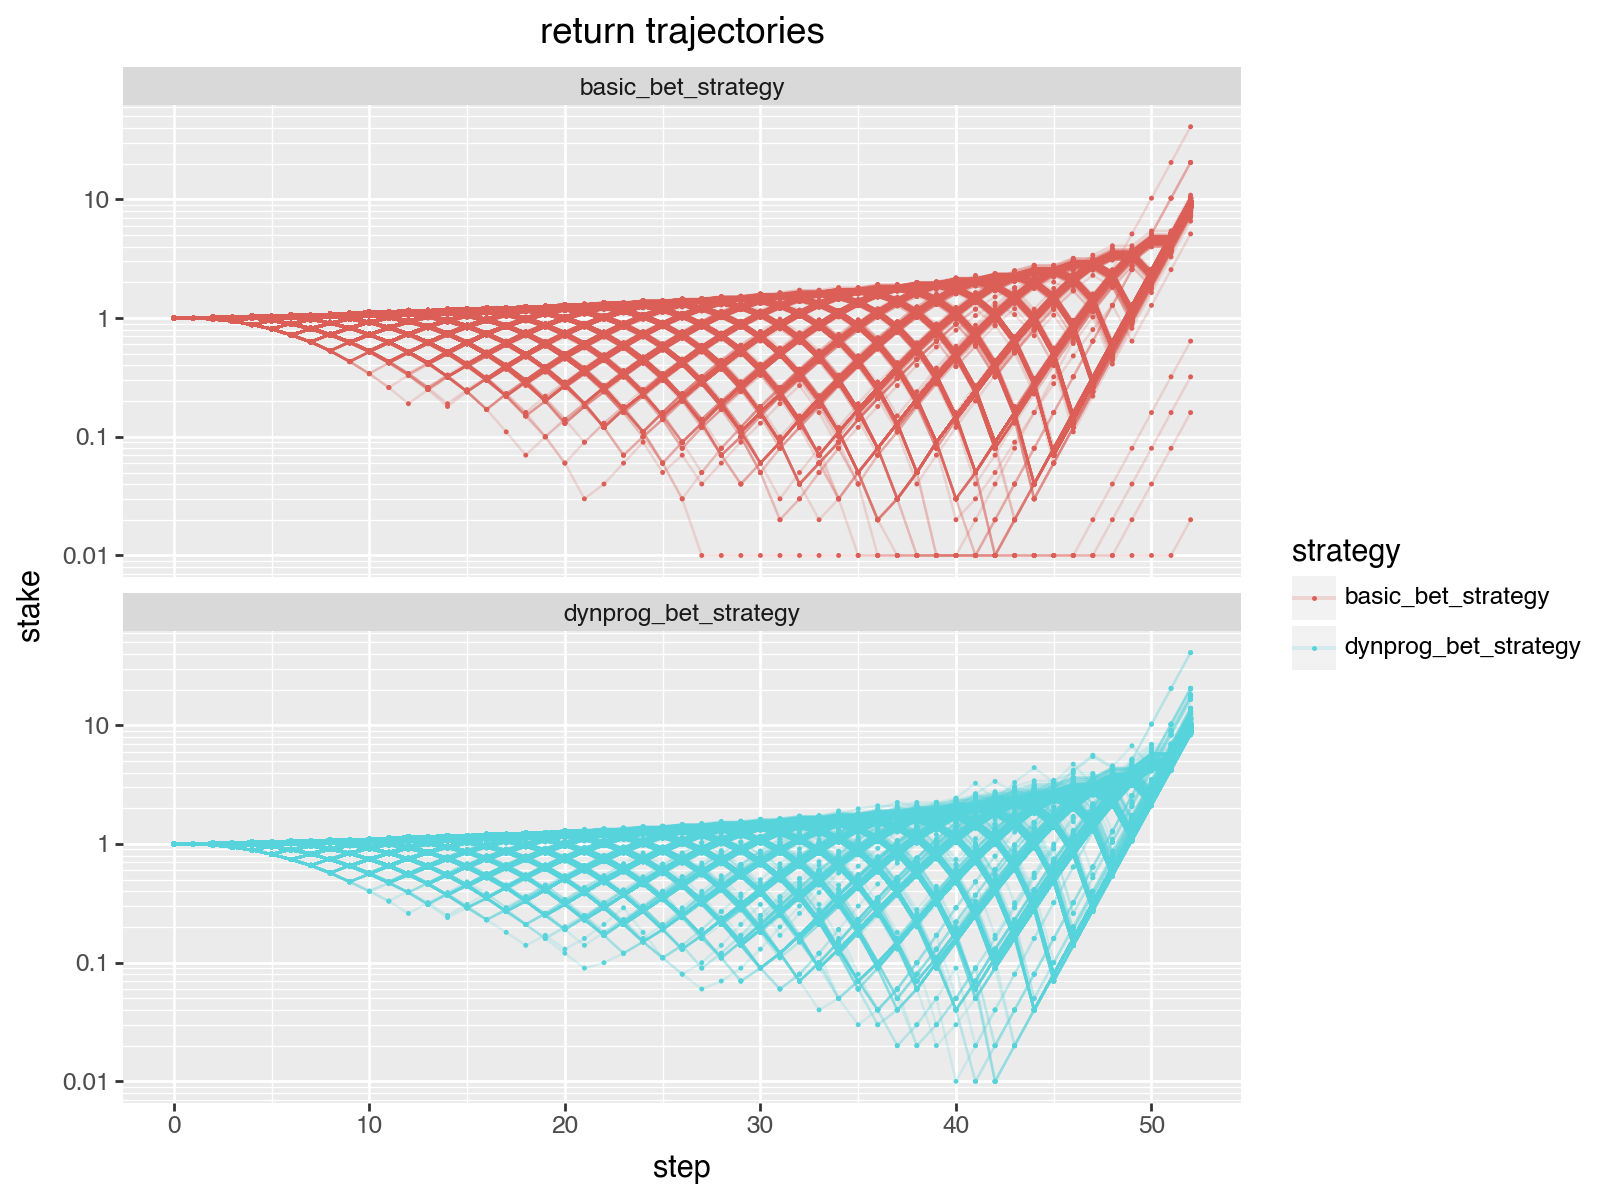

In [45]:
(
    ggplot(
        data=trajectories,
        mapping=aes(x="step", y="stake", color="strategy", group="trajectory"),
    )
    + geom_point(size=0)
    + geom_line(alpha=0.2)
    + scale_y_continuous(trans="log10")
    + facet_wrap("strategy", ncol=1)
    + ggtitle("return trajectories")
)

In [46]:
def mk_traj_frame_Kelly(i, *, decks):
    traj = []
    run_bets(decks[i], trajectory=traj)
    return pd.DataFrame(
        {
            "step": range(len(traj)),
            "stake": traj,
            "strategy": "Kelly",
            "trajectory": i,
        }
    )

In [47]:
trajectories_Kelly = pd.concat([
    mk_traj_frame_Kelly(
        i,
        decks=decks,
    )
    for i in range(len(decks))
], ignore_index=True)

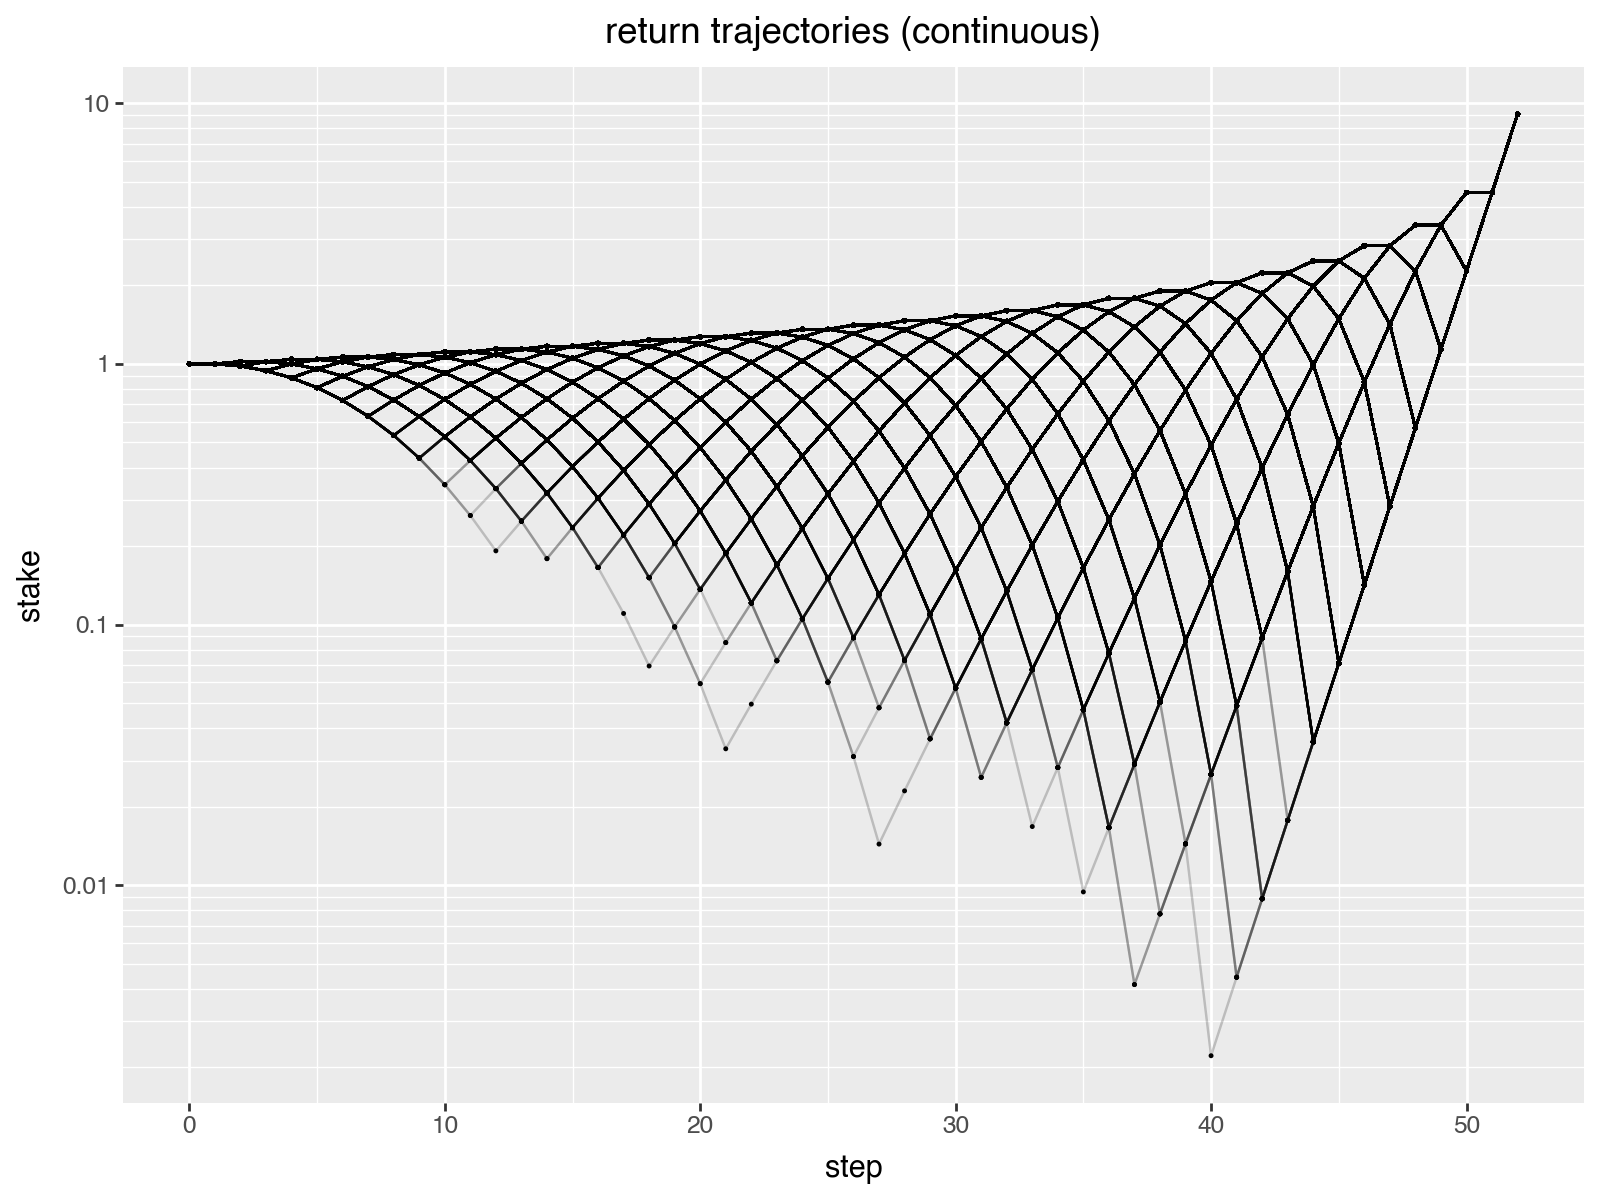

In [48]:
(
    ggplot(
        data=trajectories_Kelly,
        mapping=aes(x="step", y="stake", group="trajectory"),
    )
    + geom_point(size=0)
    + geom_line(alpha=0.2)
    + scale_y_continuous(trans="log10")
    + ggtitle("return trajectories (continuous)")
)

In [49]:

def plot_comparative_strategies(b: int, r: int):
    start_frame = pd.concat([
        pd.DataFrame({
            'stake': range(initial_stake),
            'bet': [ dynprog_bet_strategy(i, b, r, satiation_point) for i in range(initial_stake) ],
            'strategy': 'dynprog'}),
        pd.DataFrame({
            'stake': range(initial_stake),
            'bet': [ basic_bet_strategy(i, b, r) for i in range(initial_stake) ],
            'strategy': 'basic'}),
    ], ignore_index=True)
    return (
        ggplot(
            data=start_frame,
            mapping=aes(x='stake', y='bet', color='strategy')
        )
        + geom_line()
        + geom_point(alpha=0.5)
        + ggtitle(f"basic and dynprog bidding for ({b} black remaining, {r} red remaining)")
    )

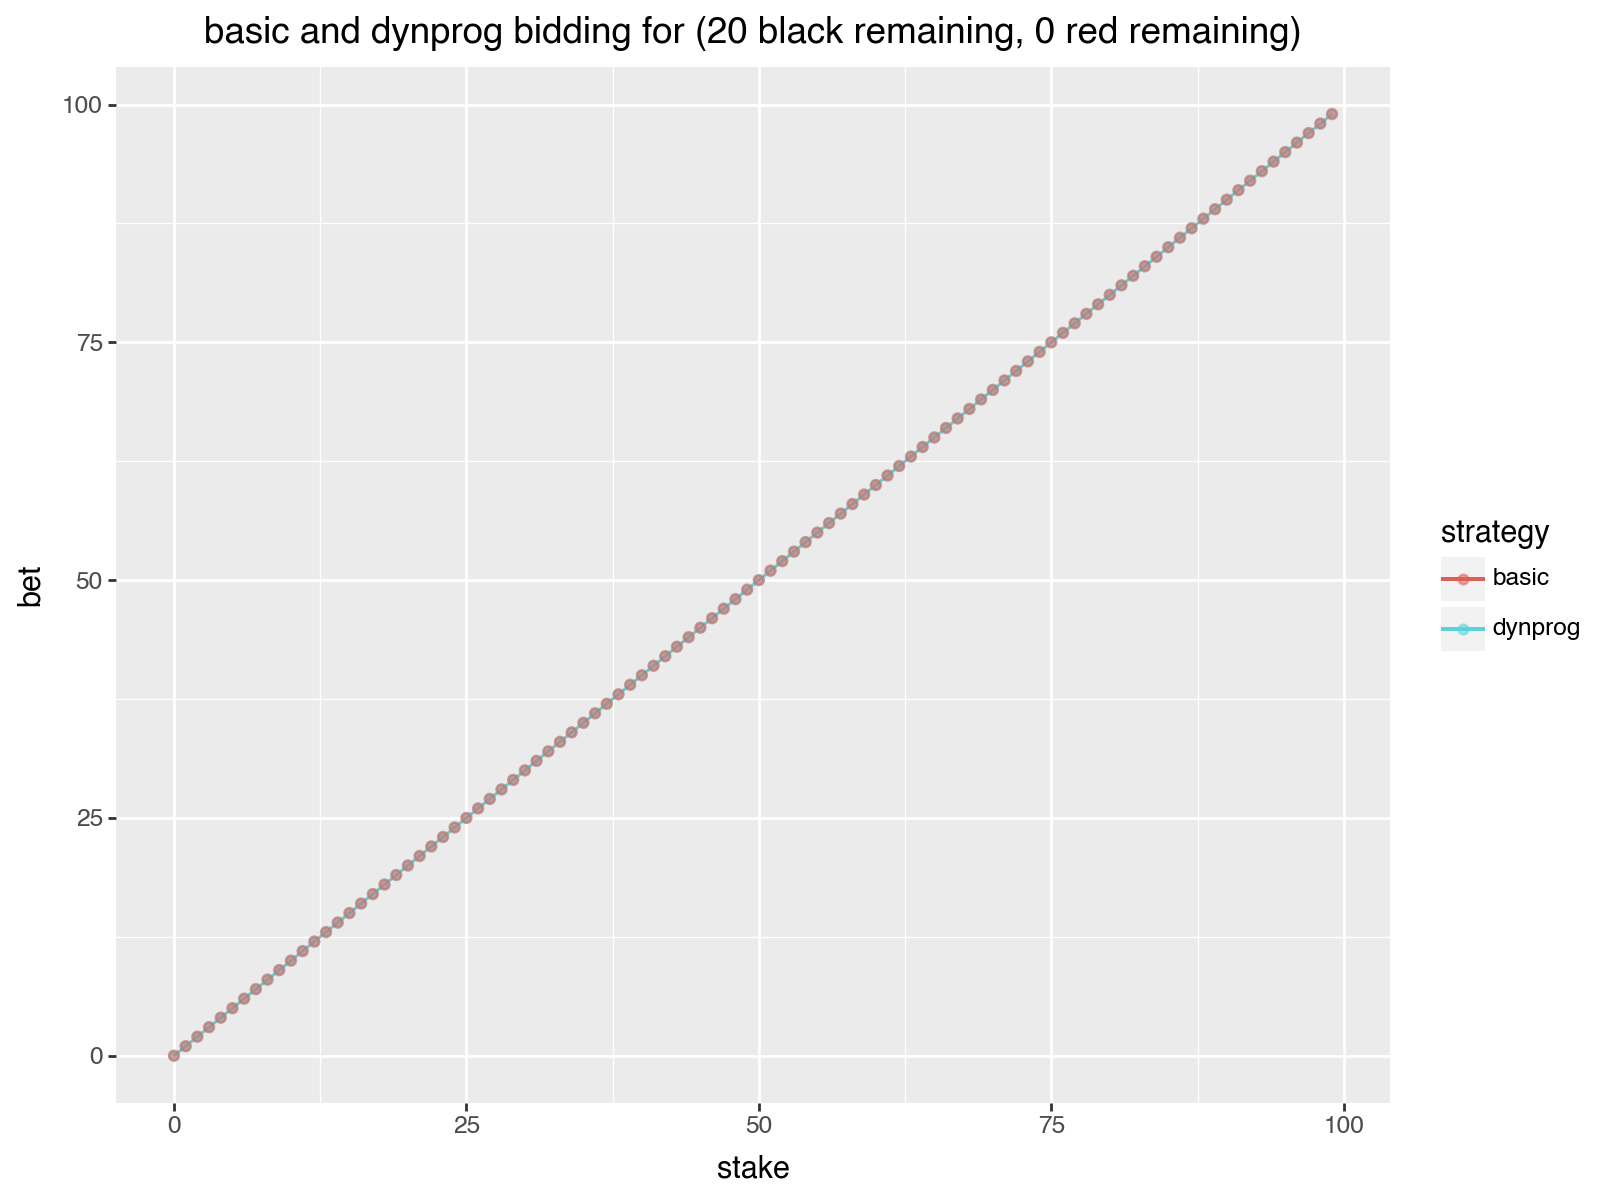

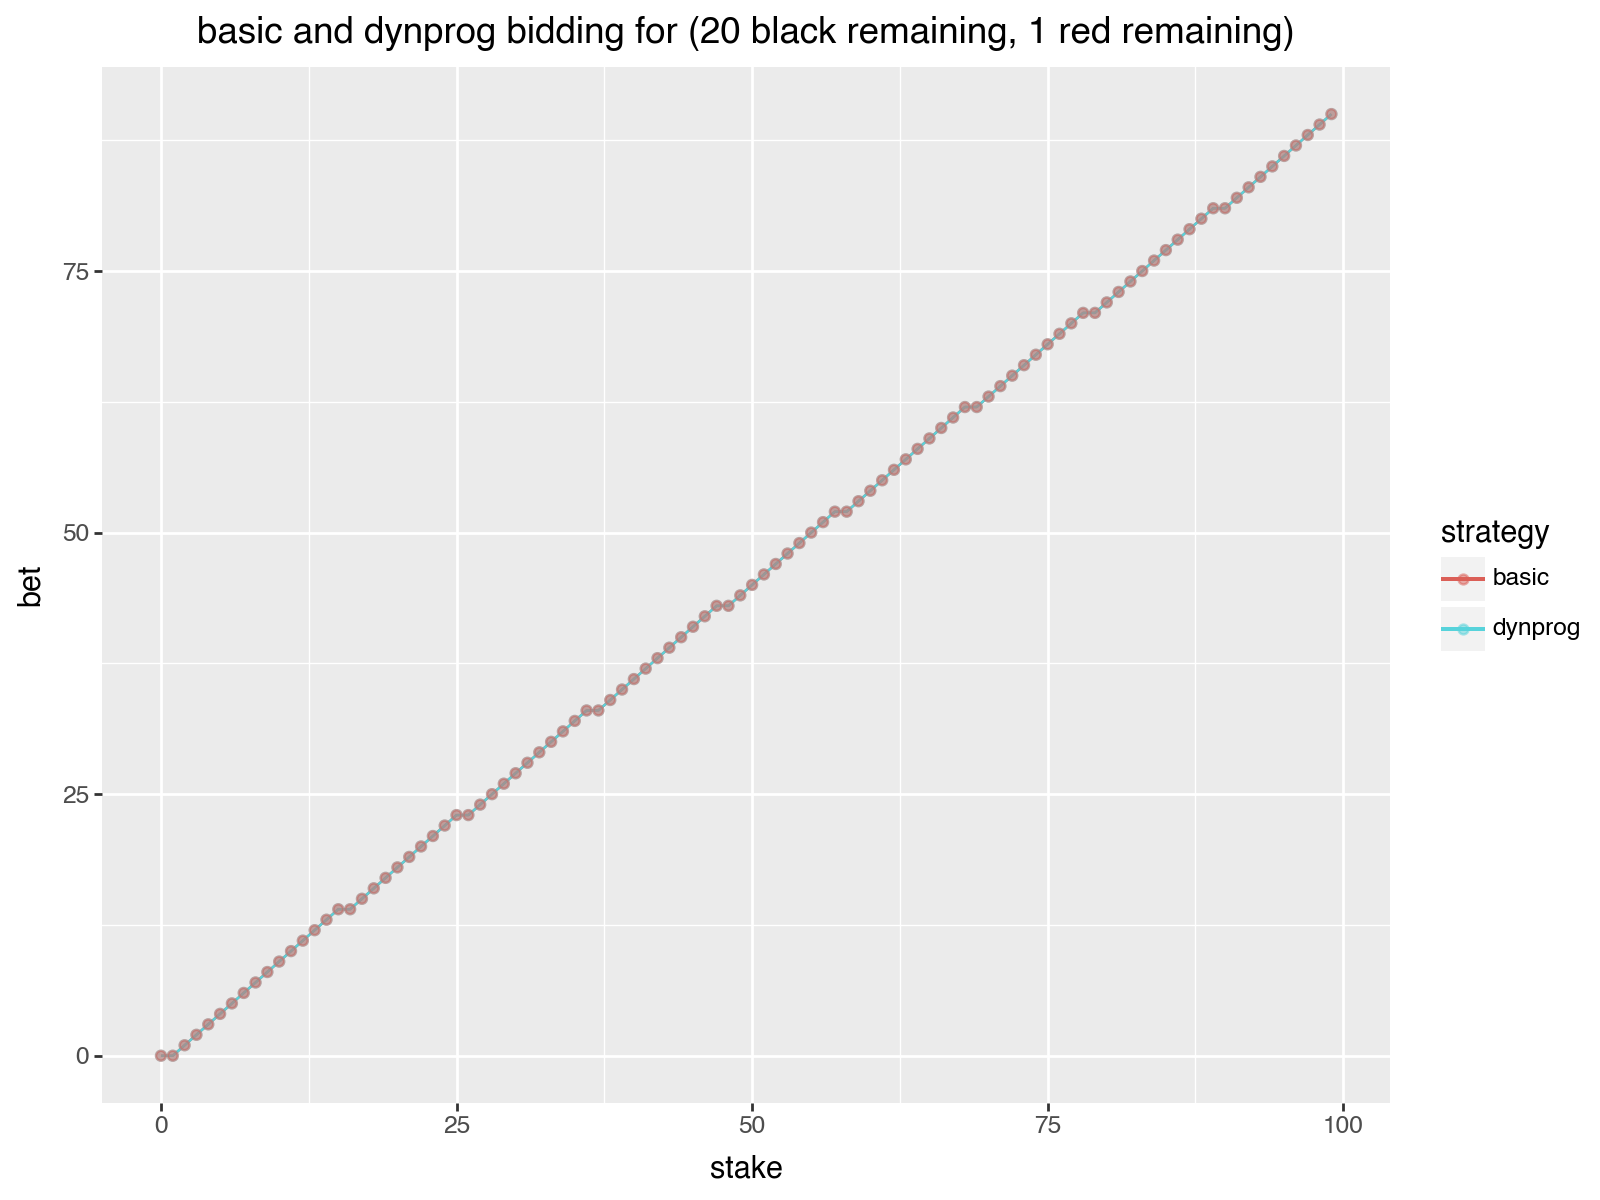

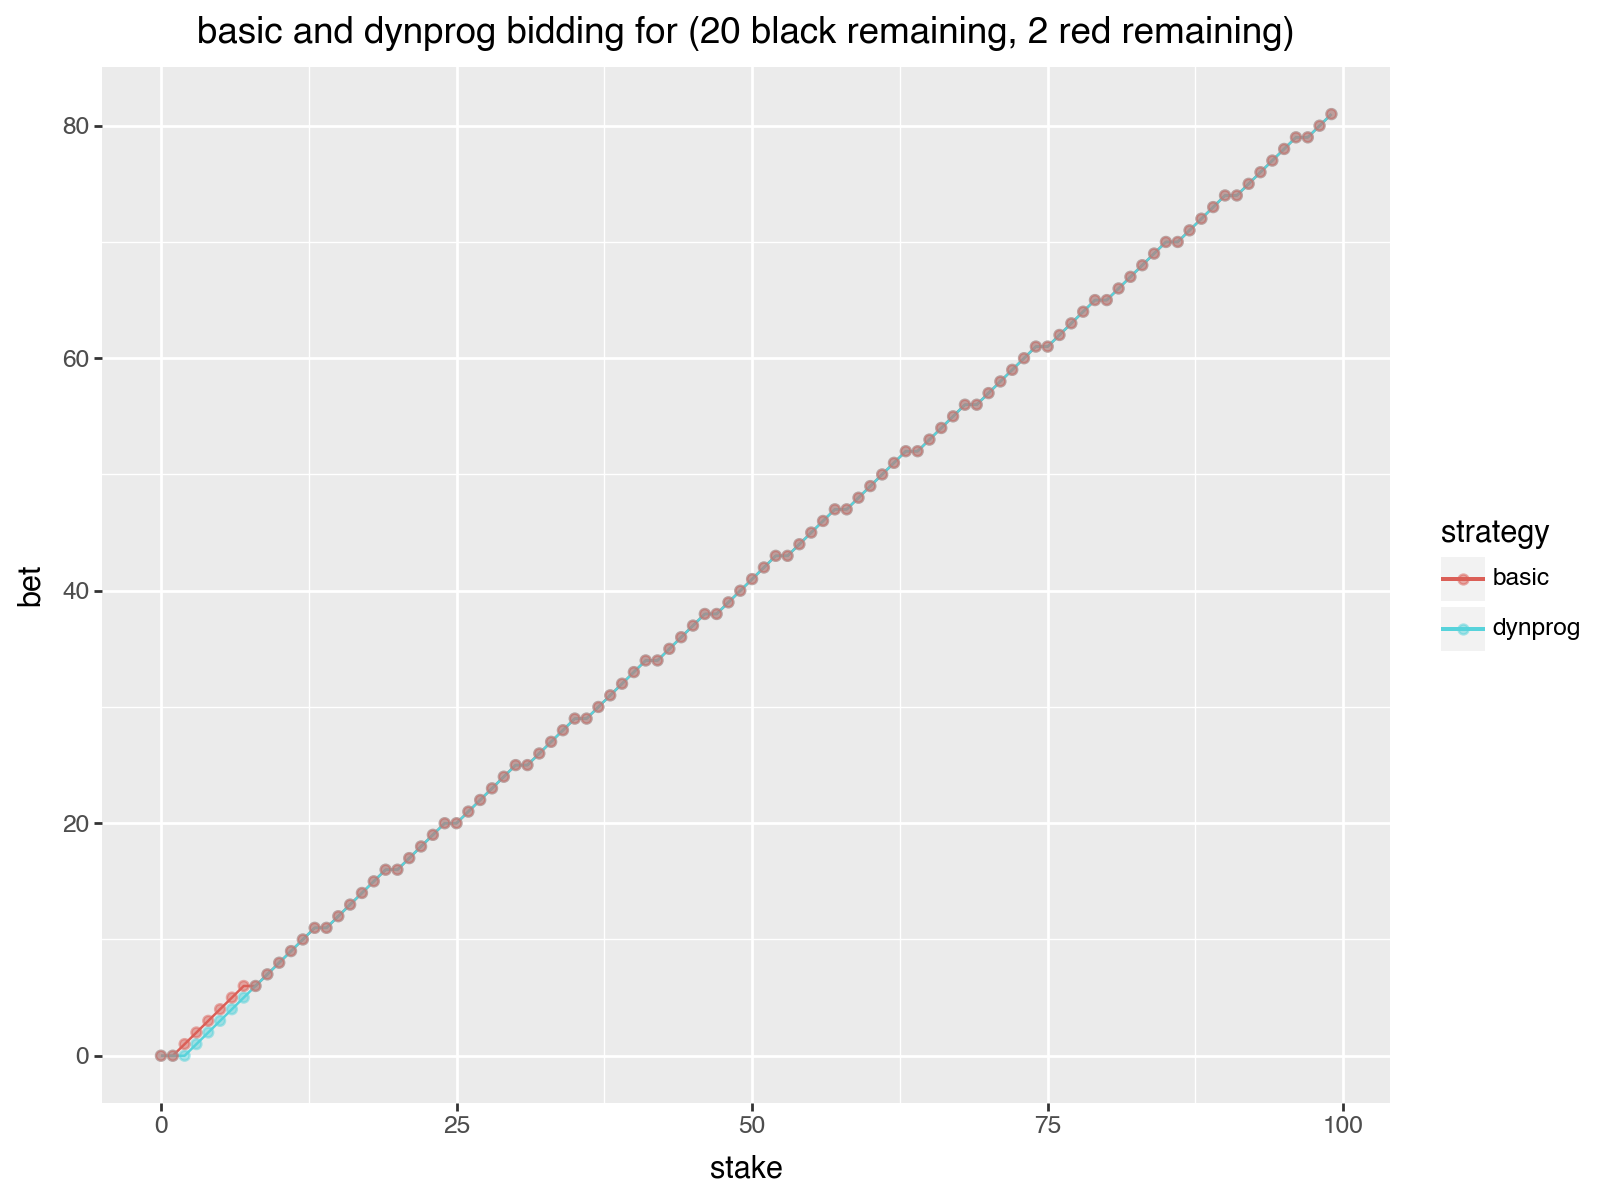

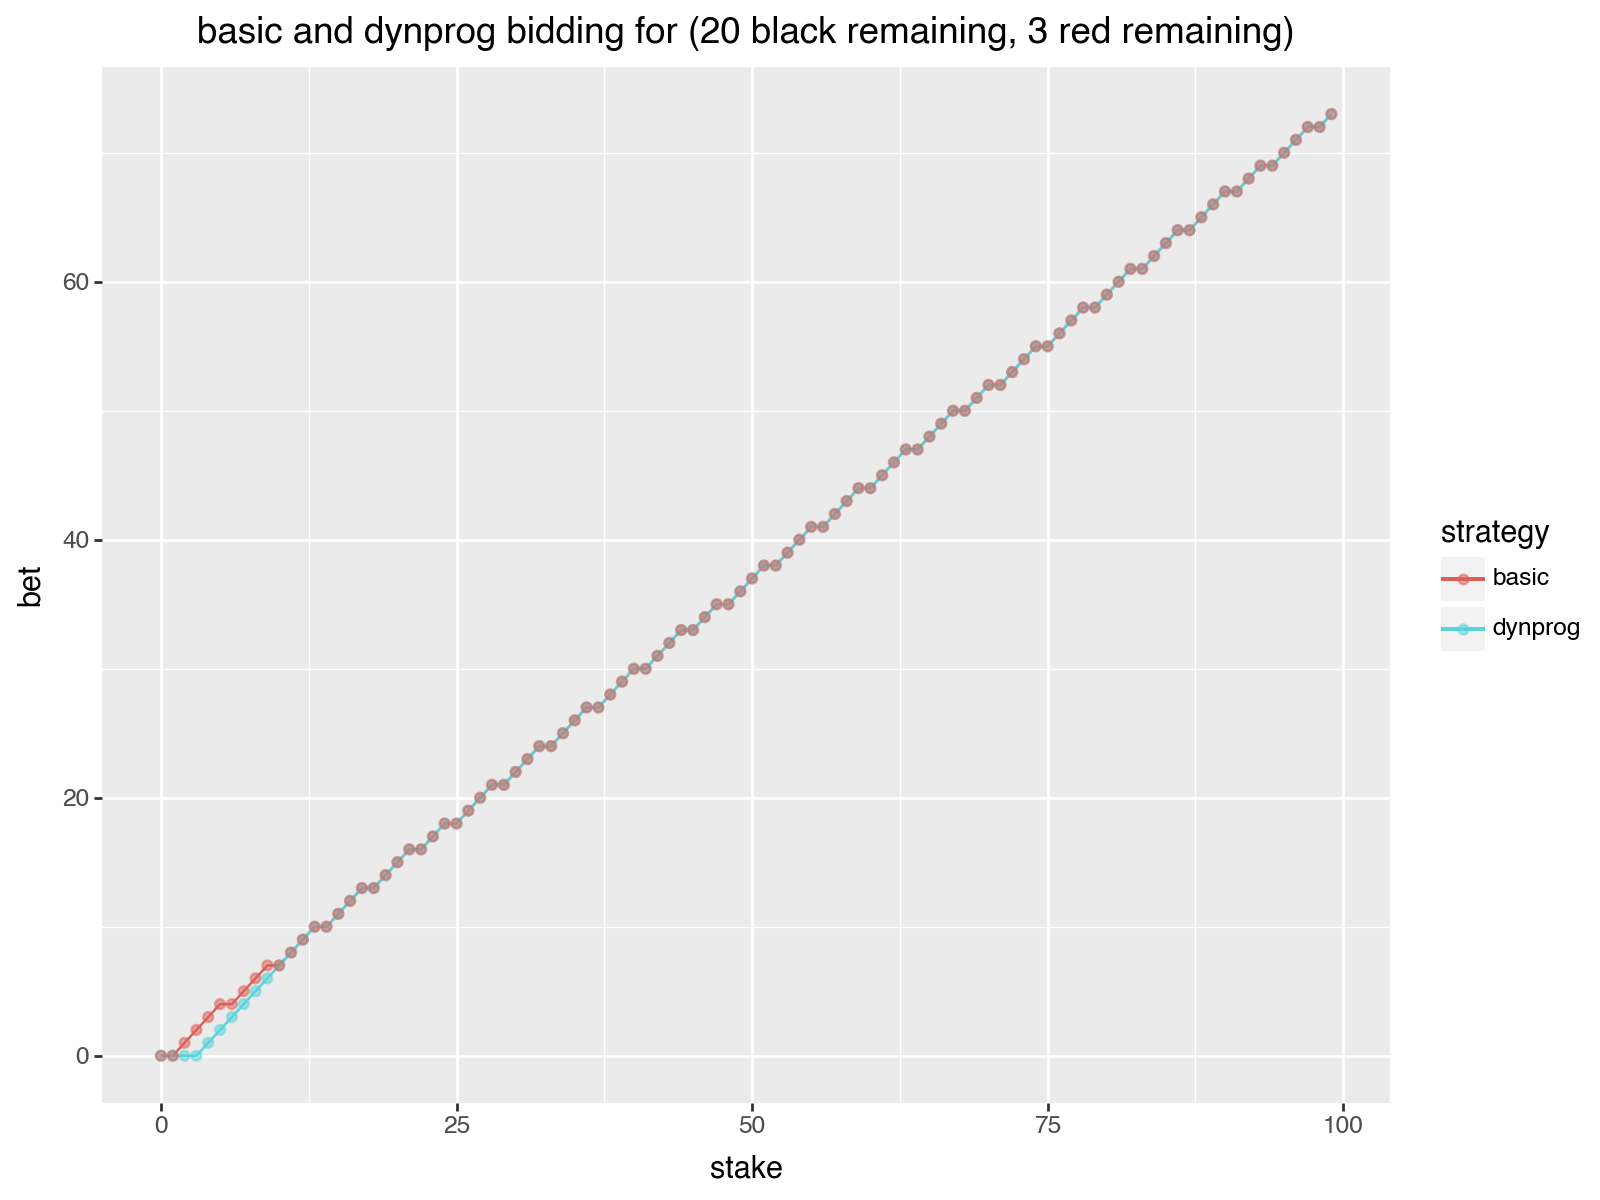

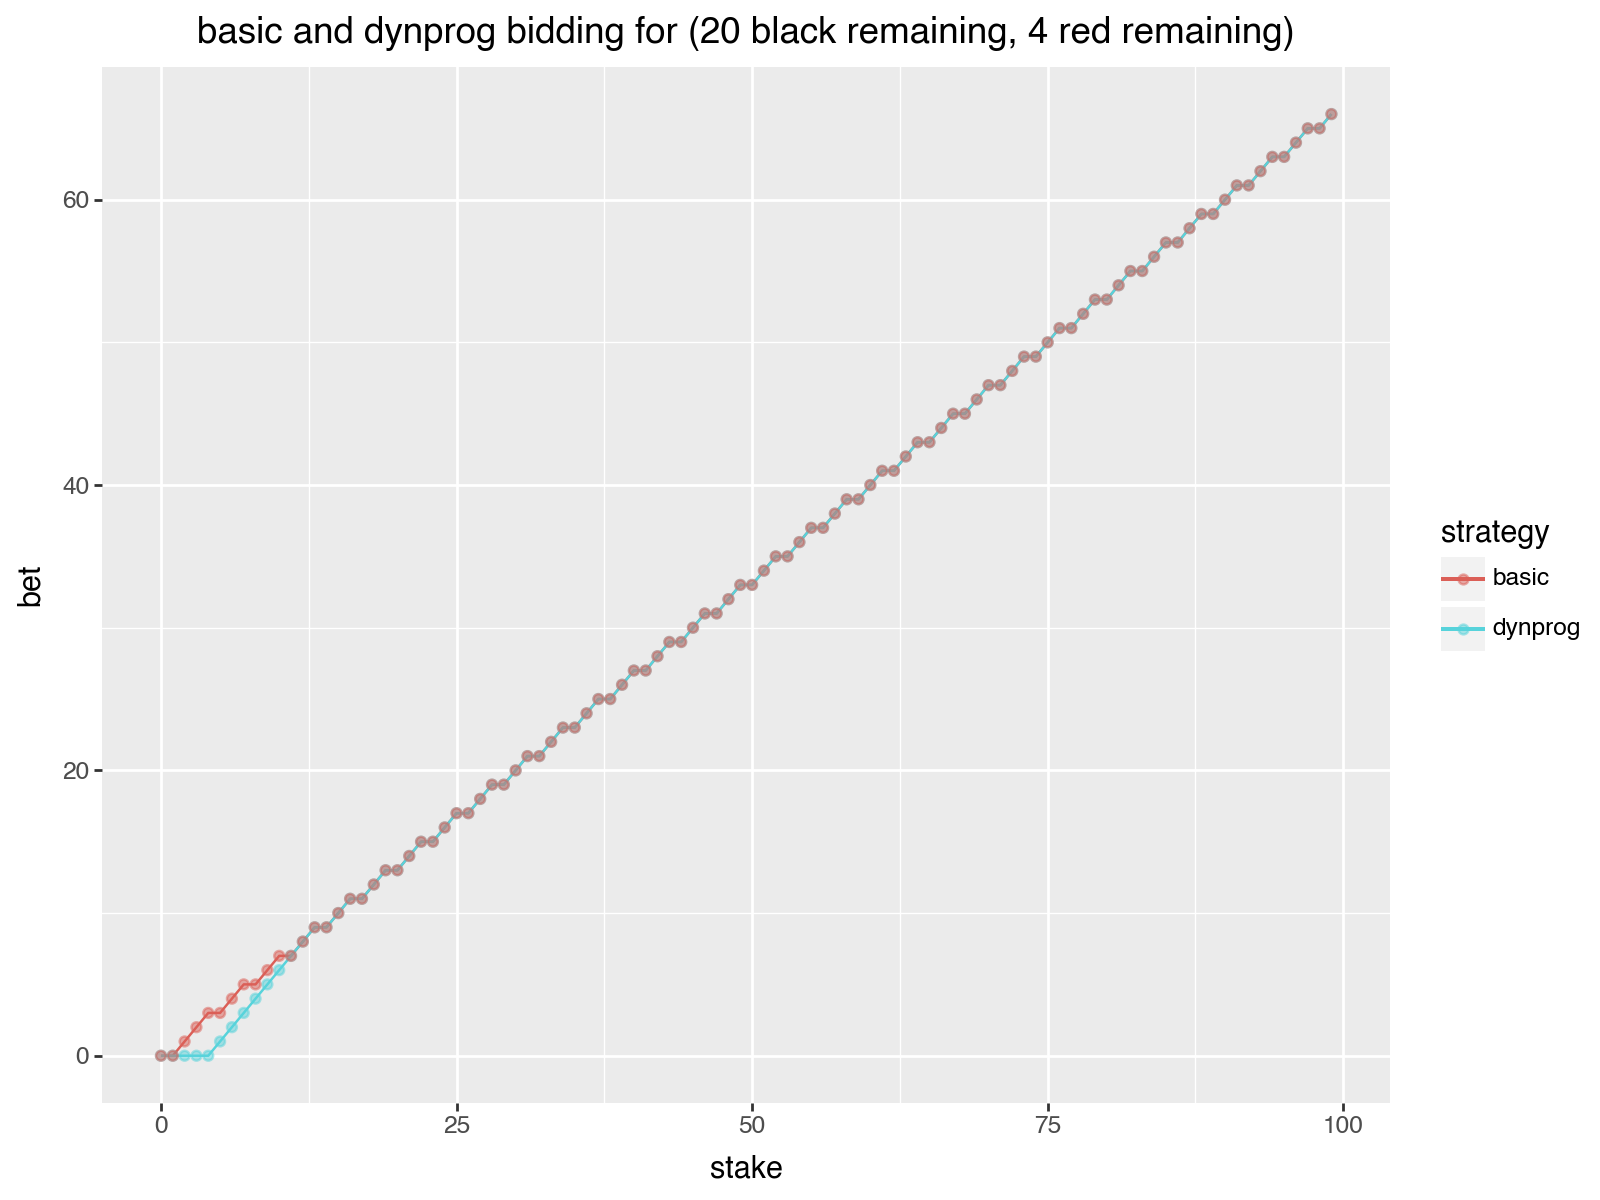

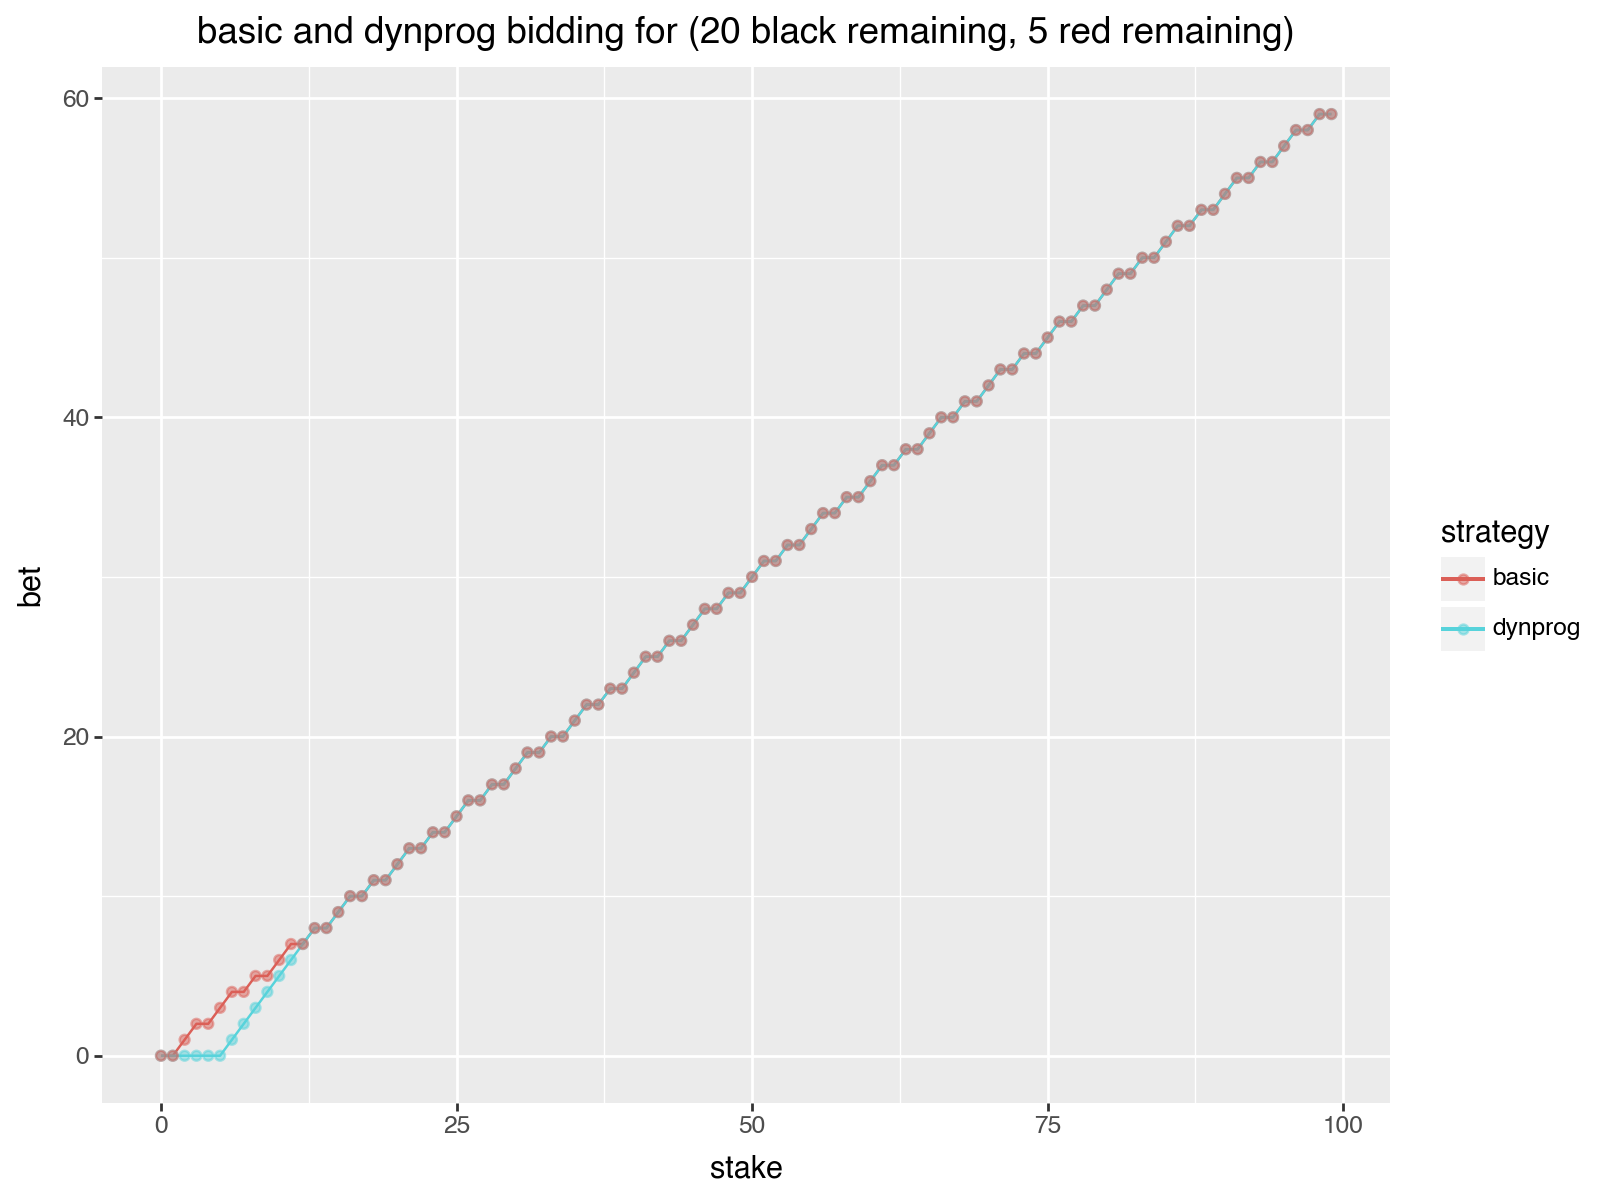

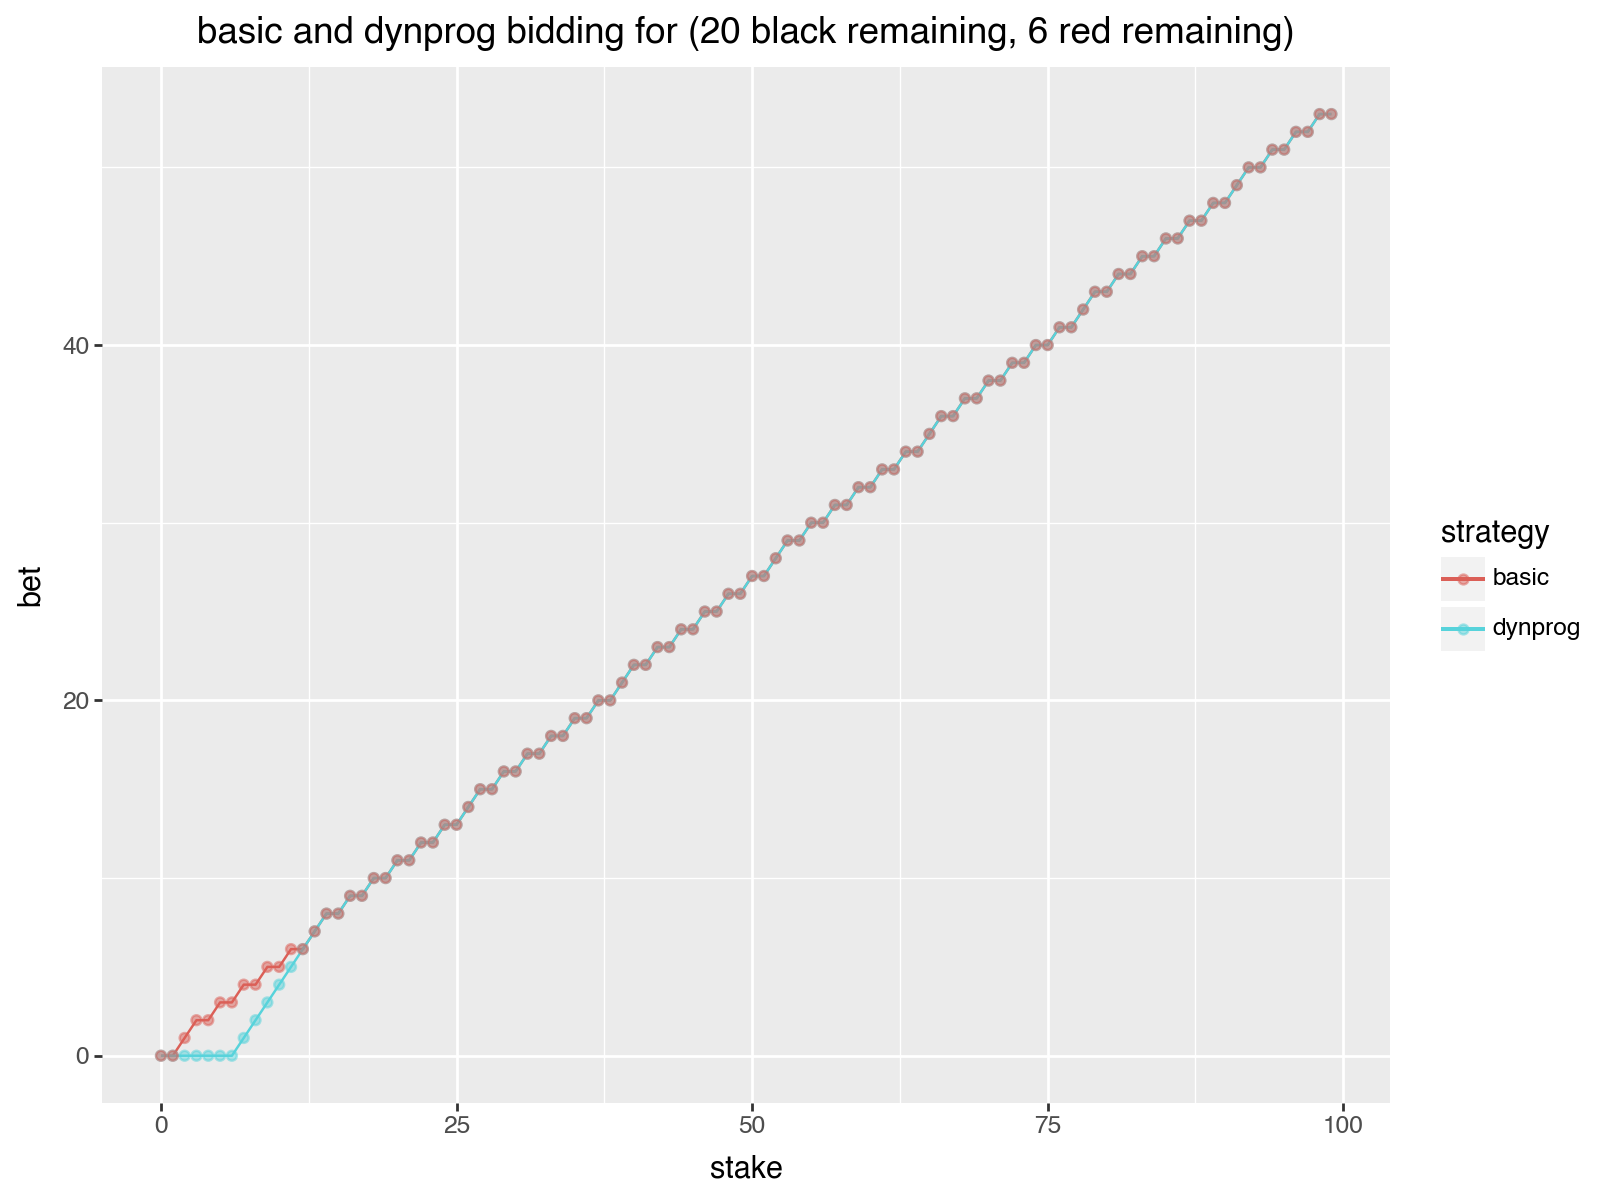

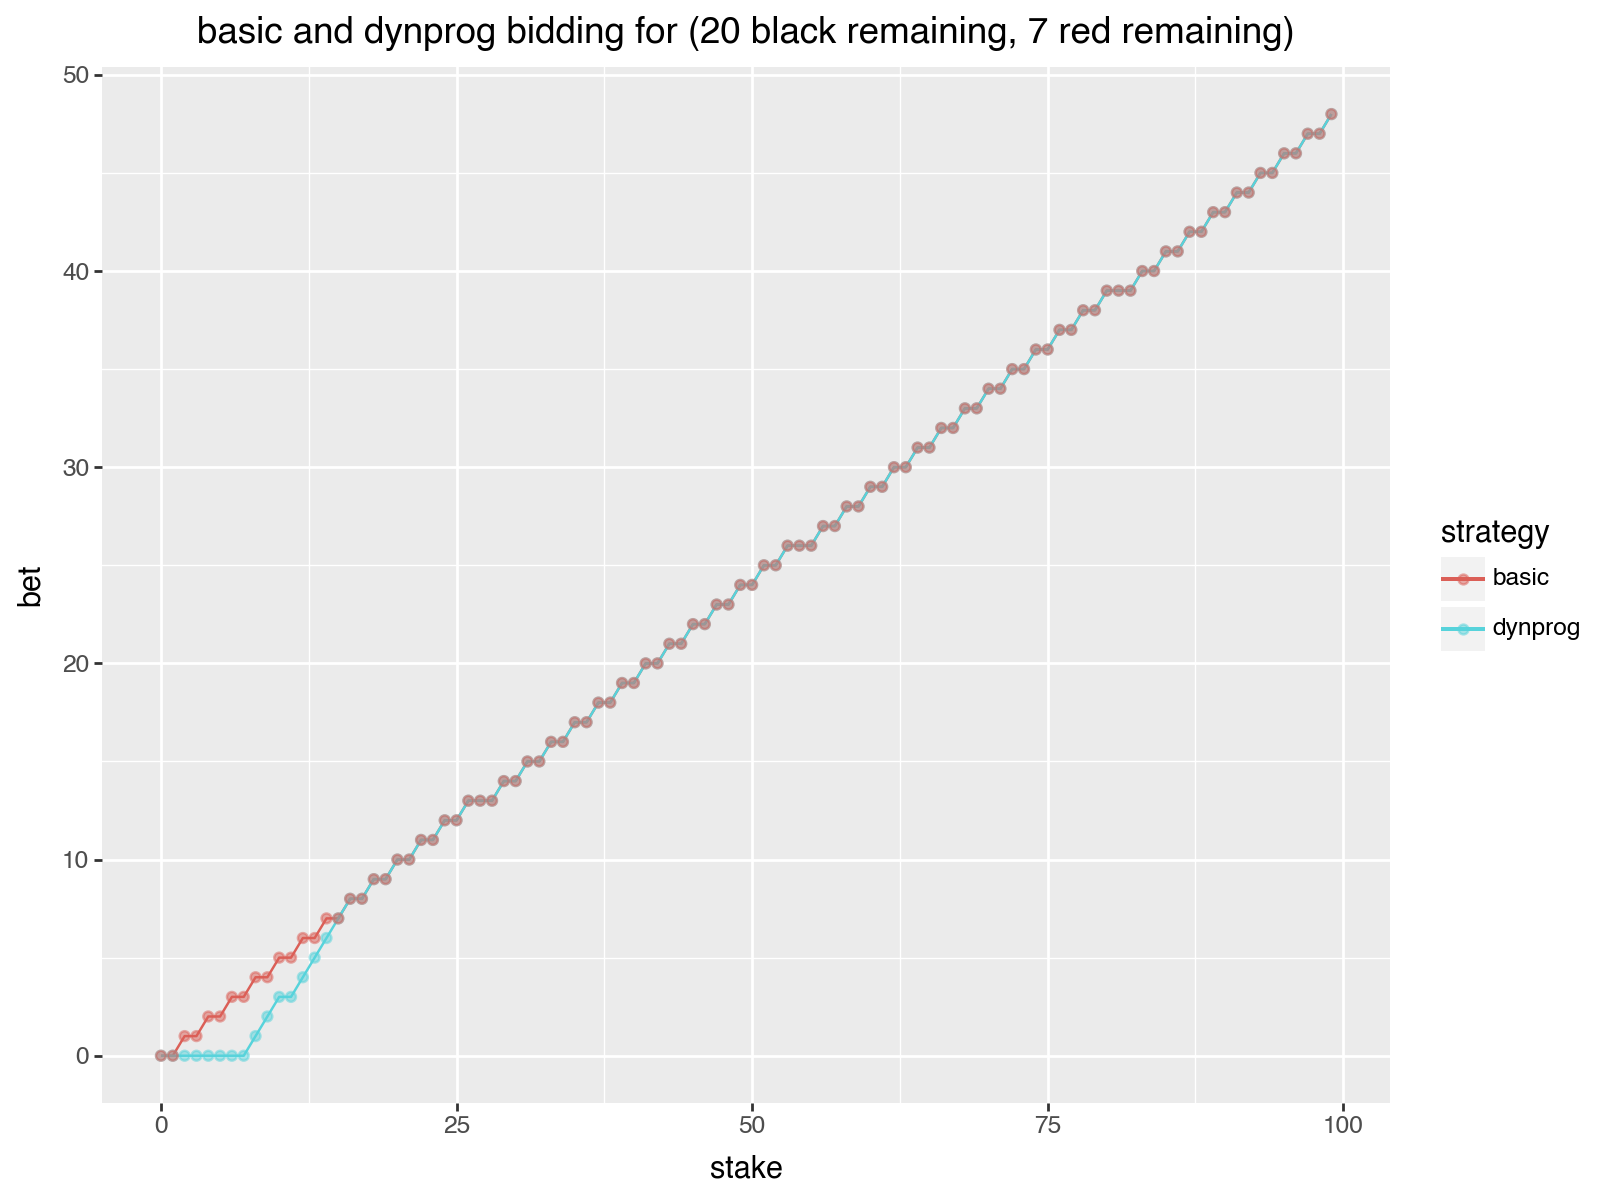

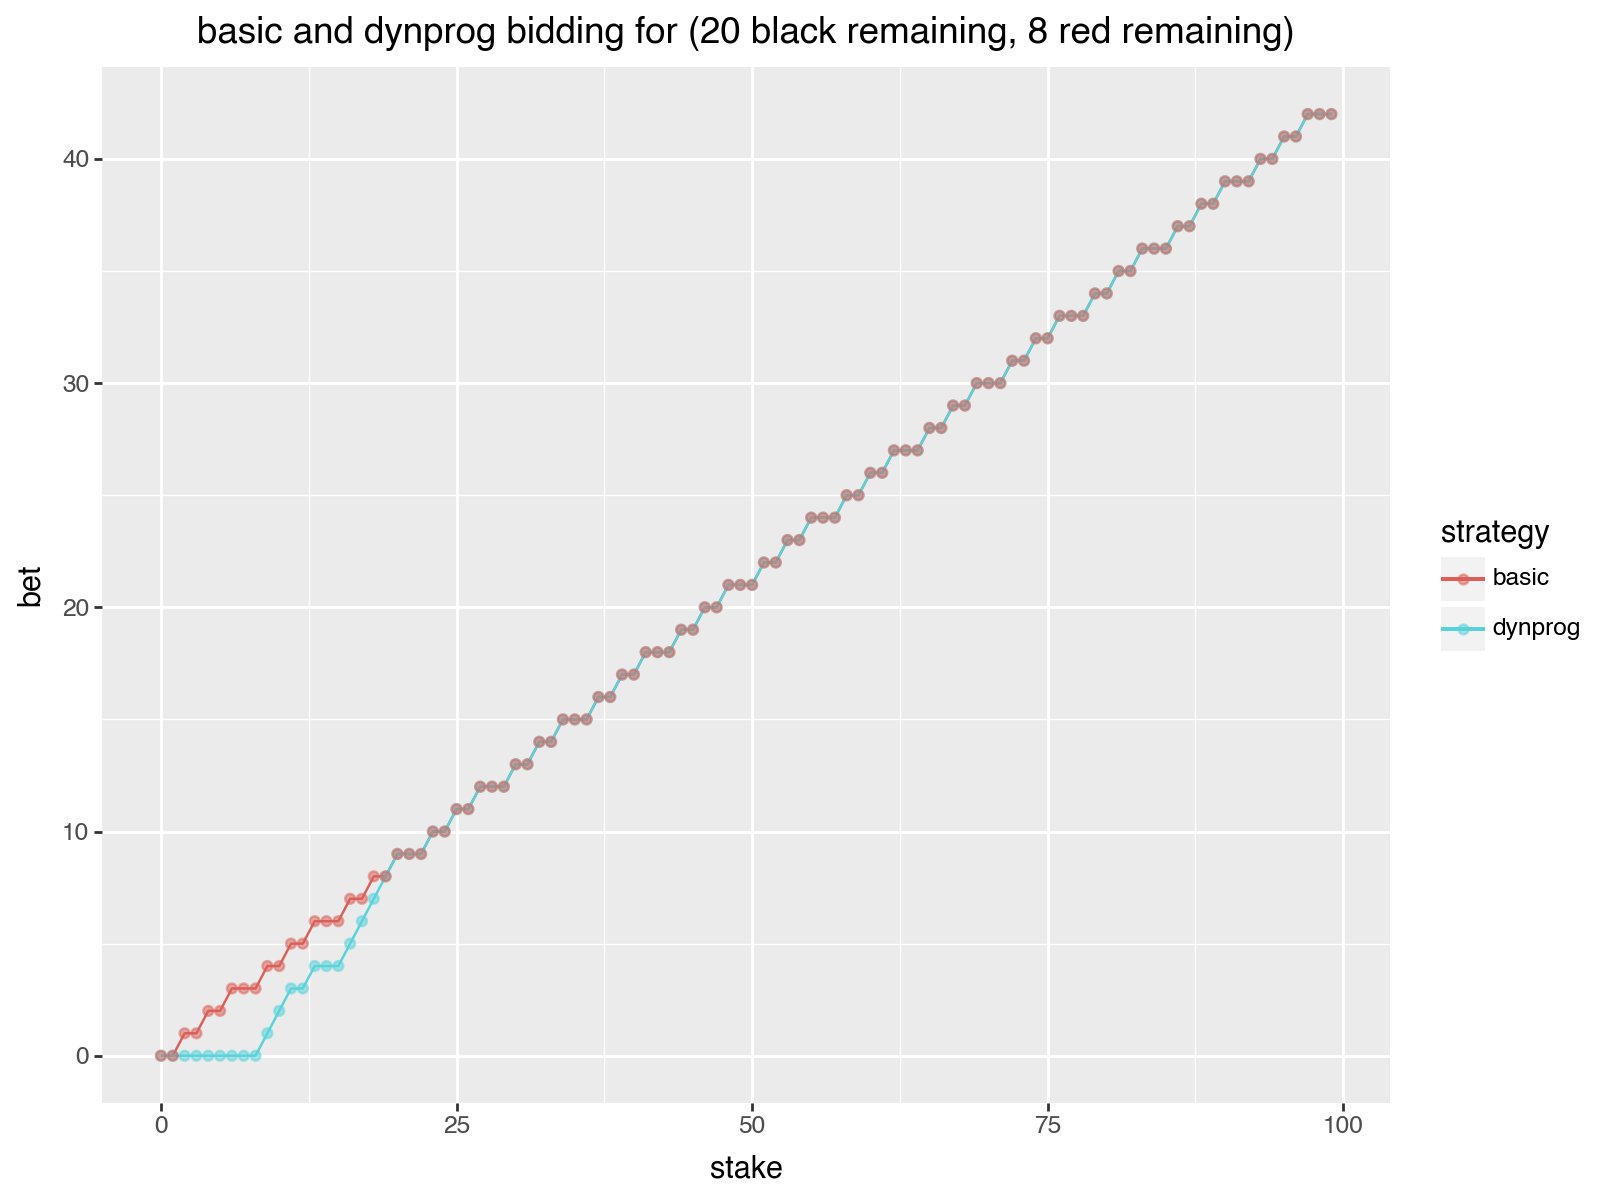

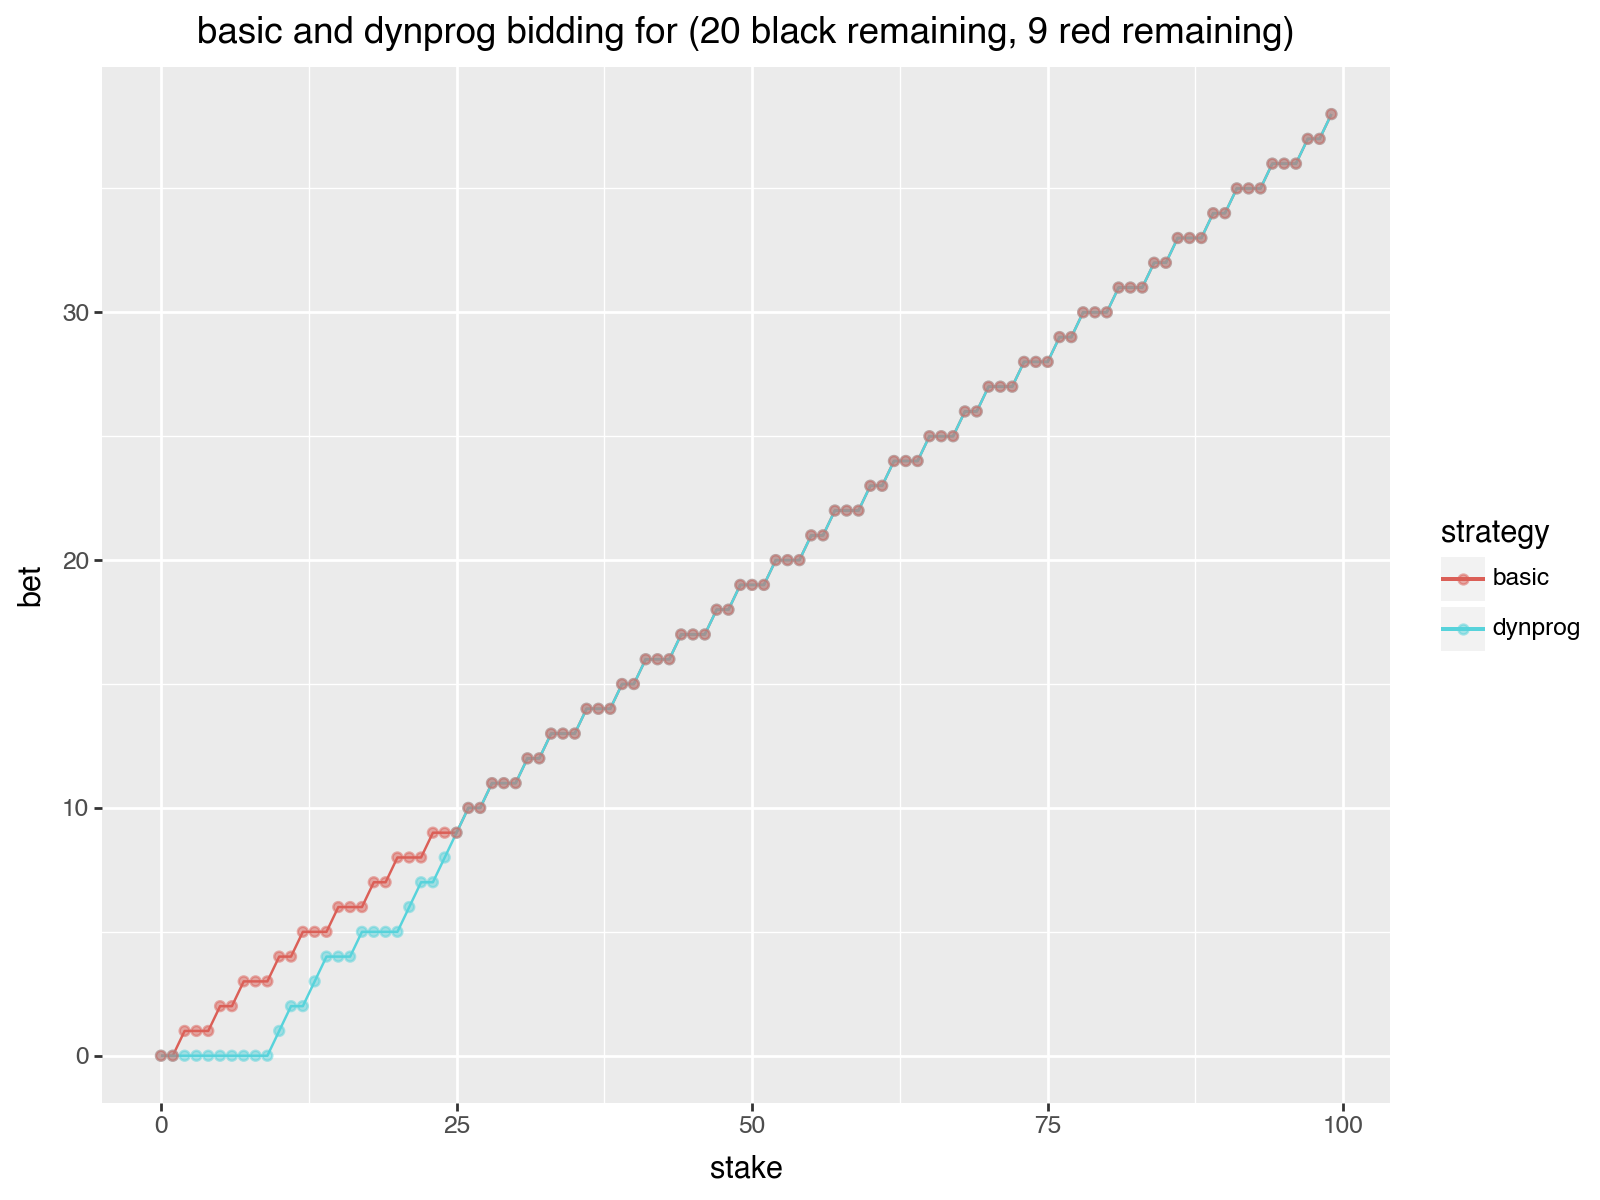

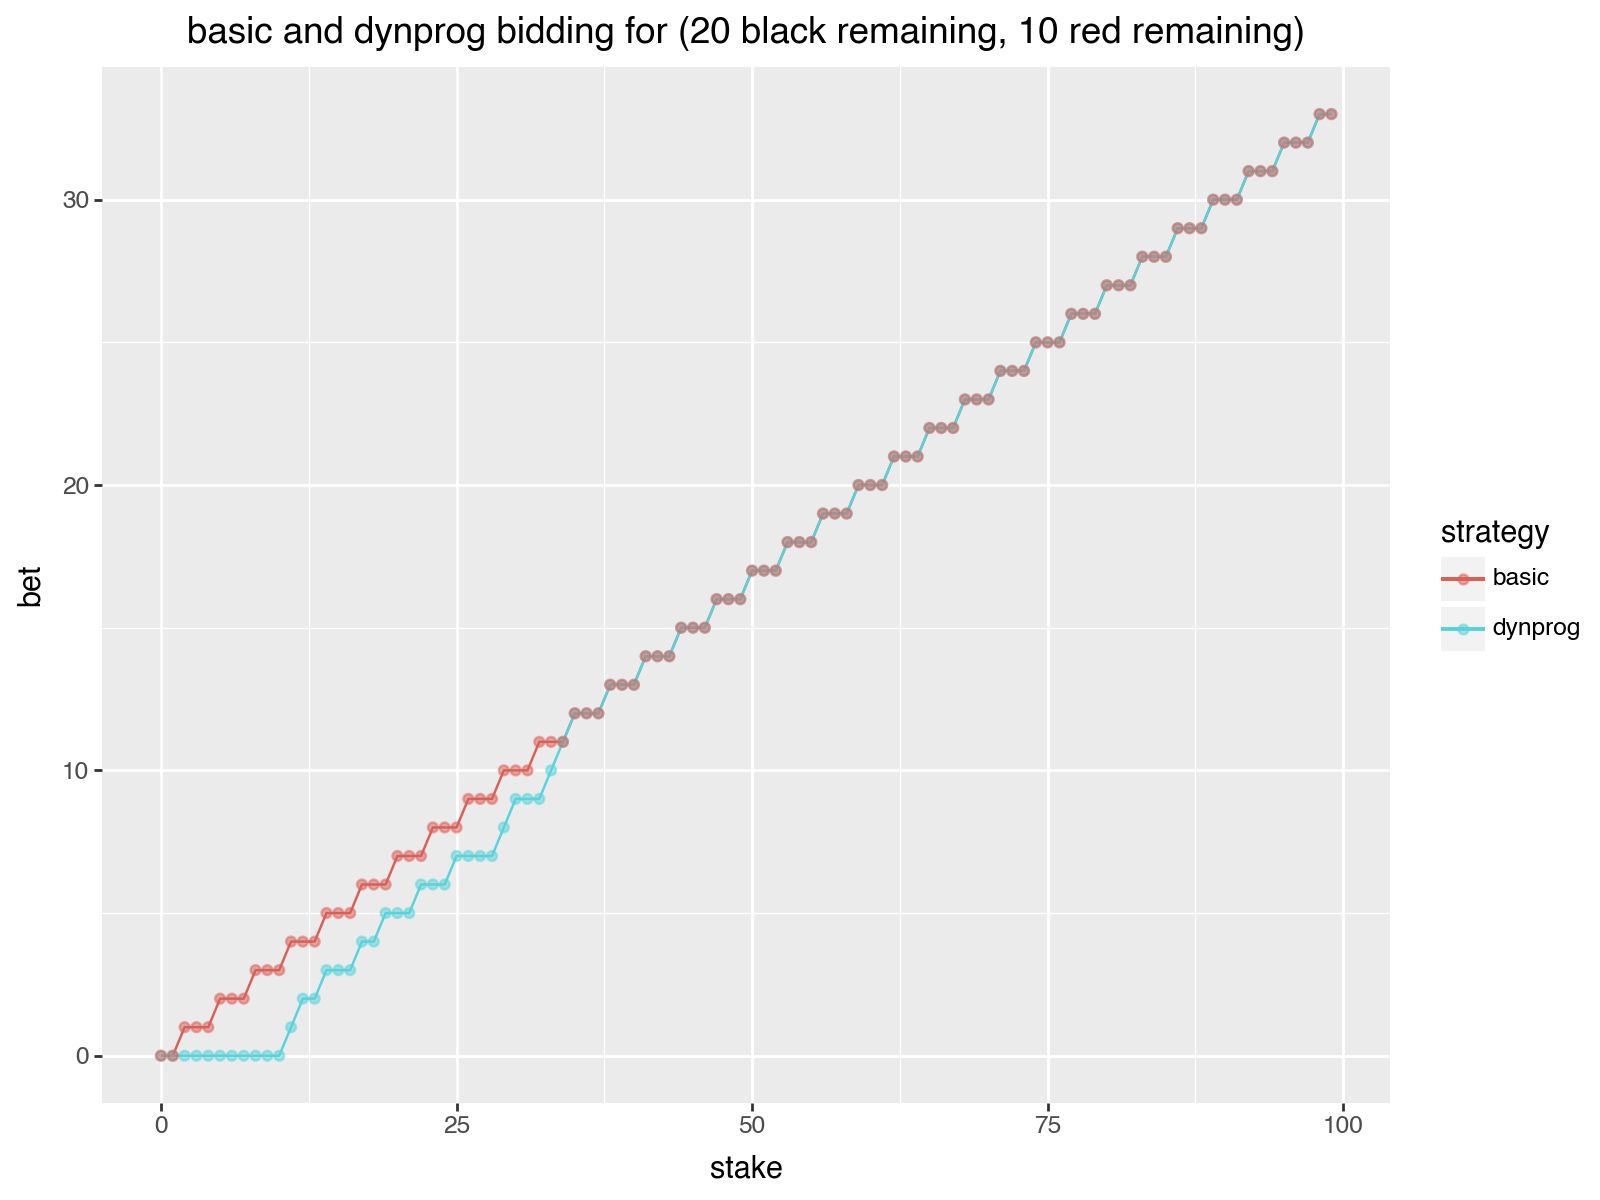

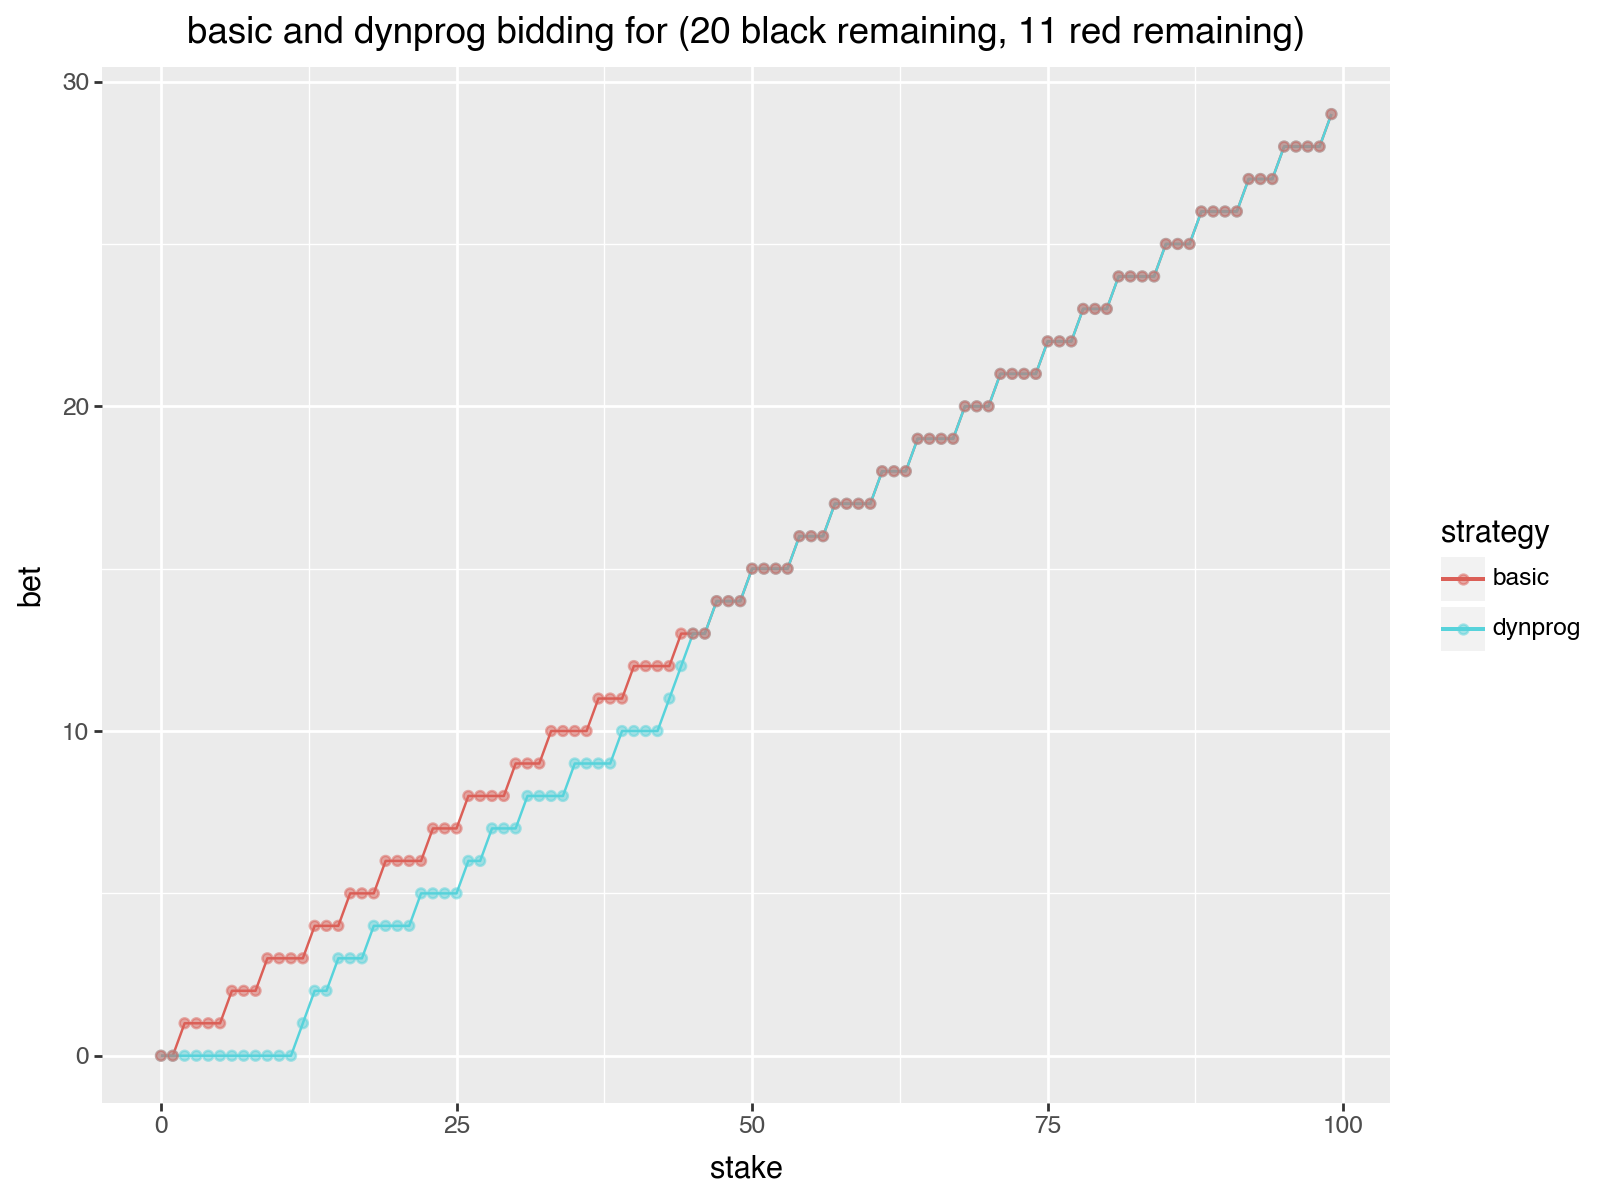

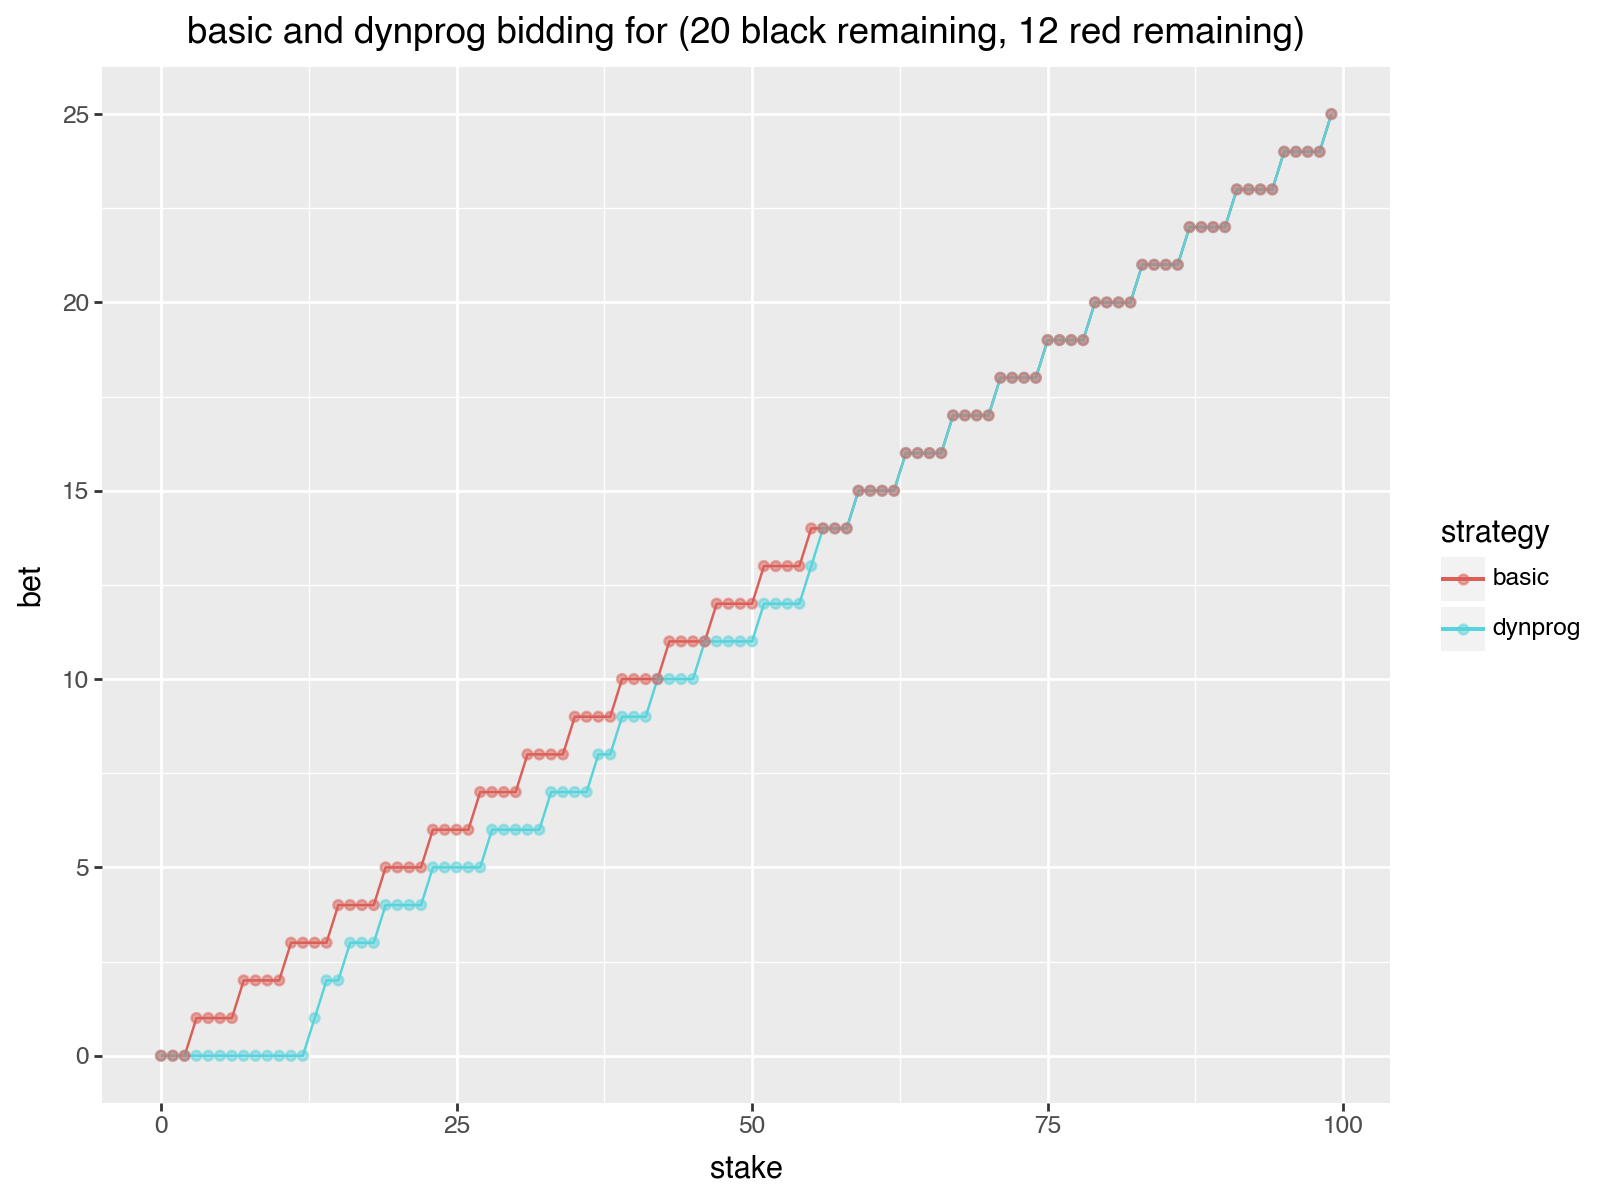

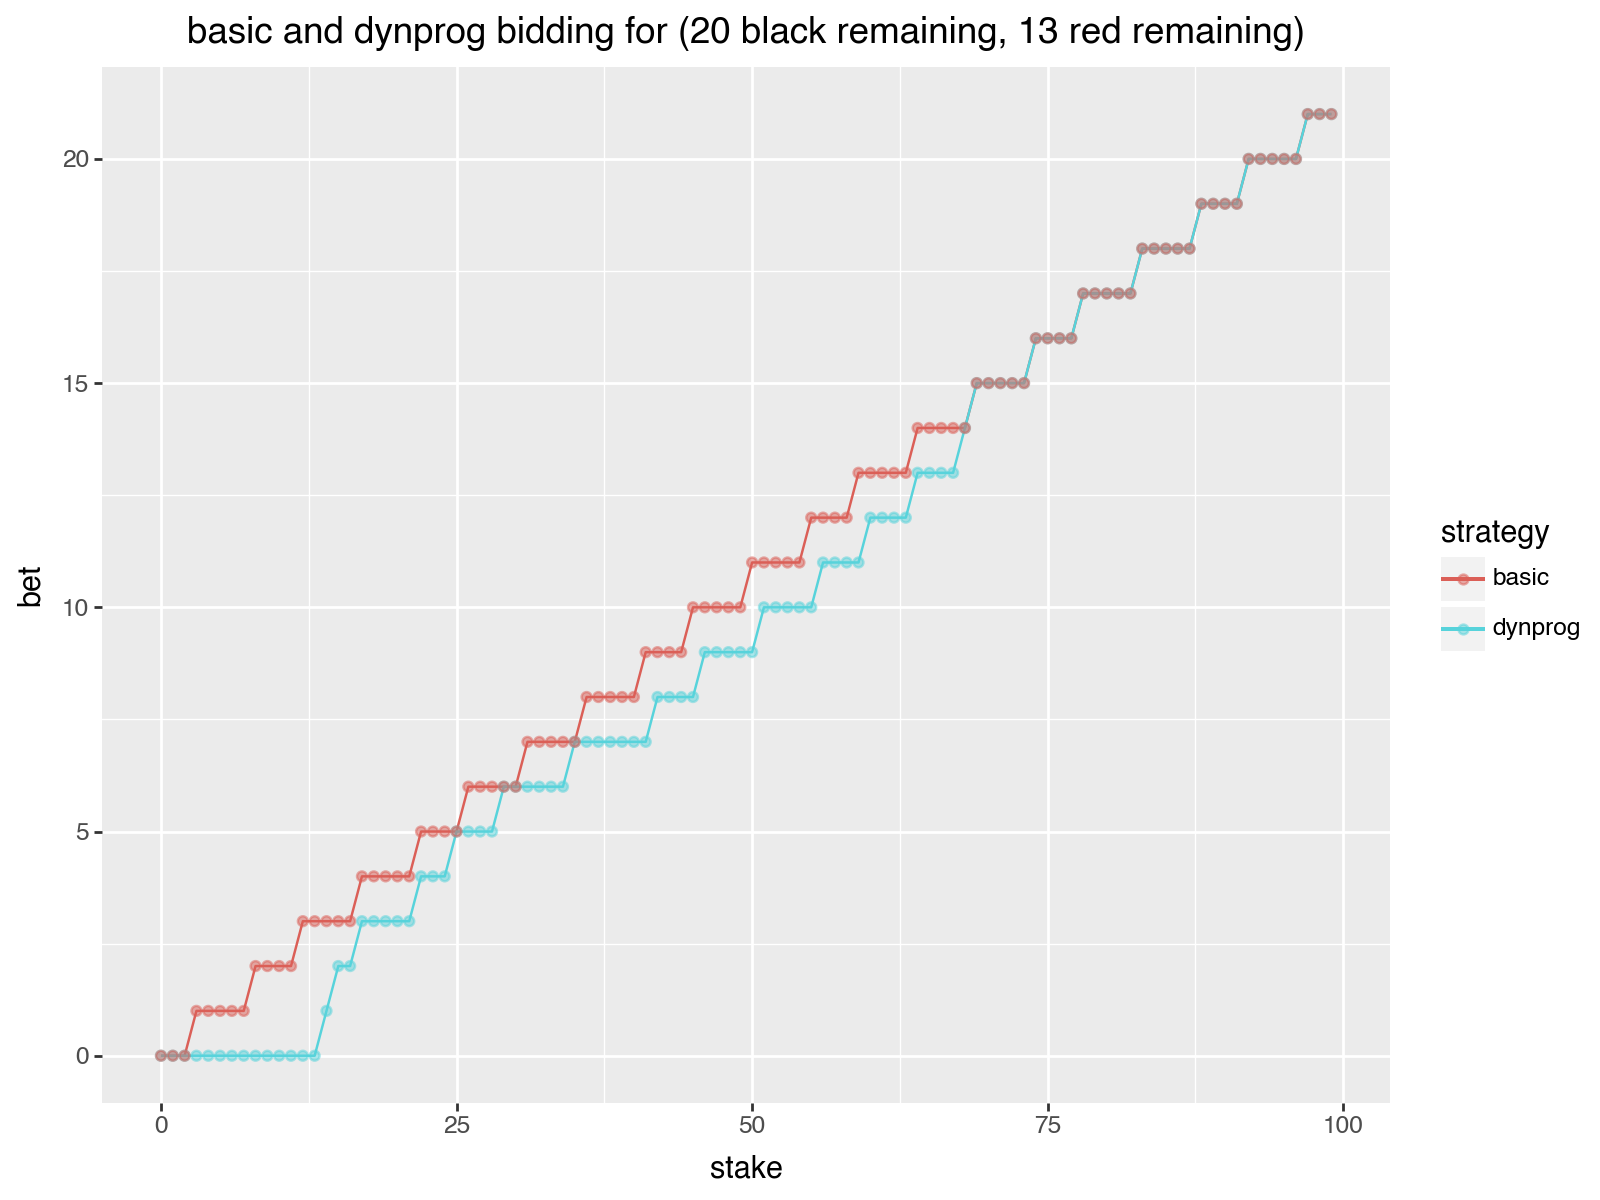

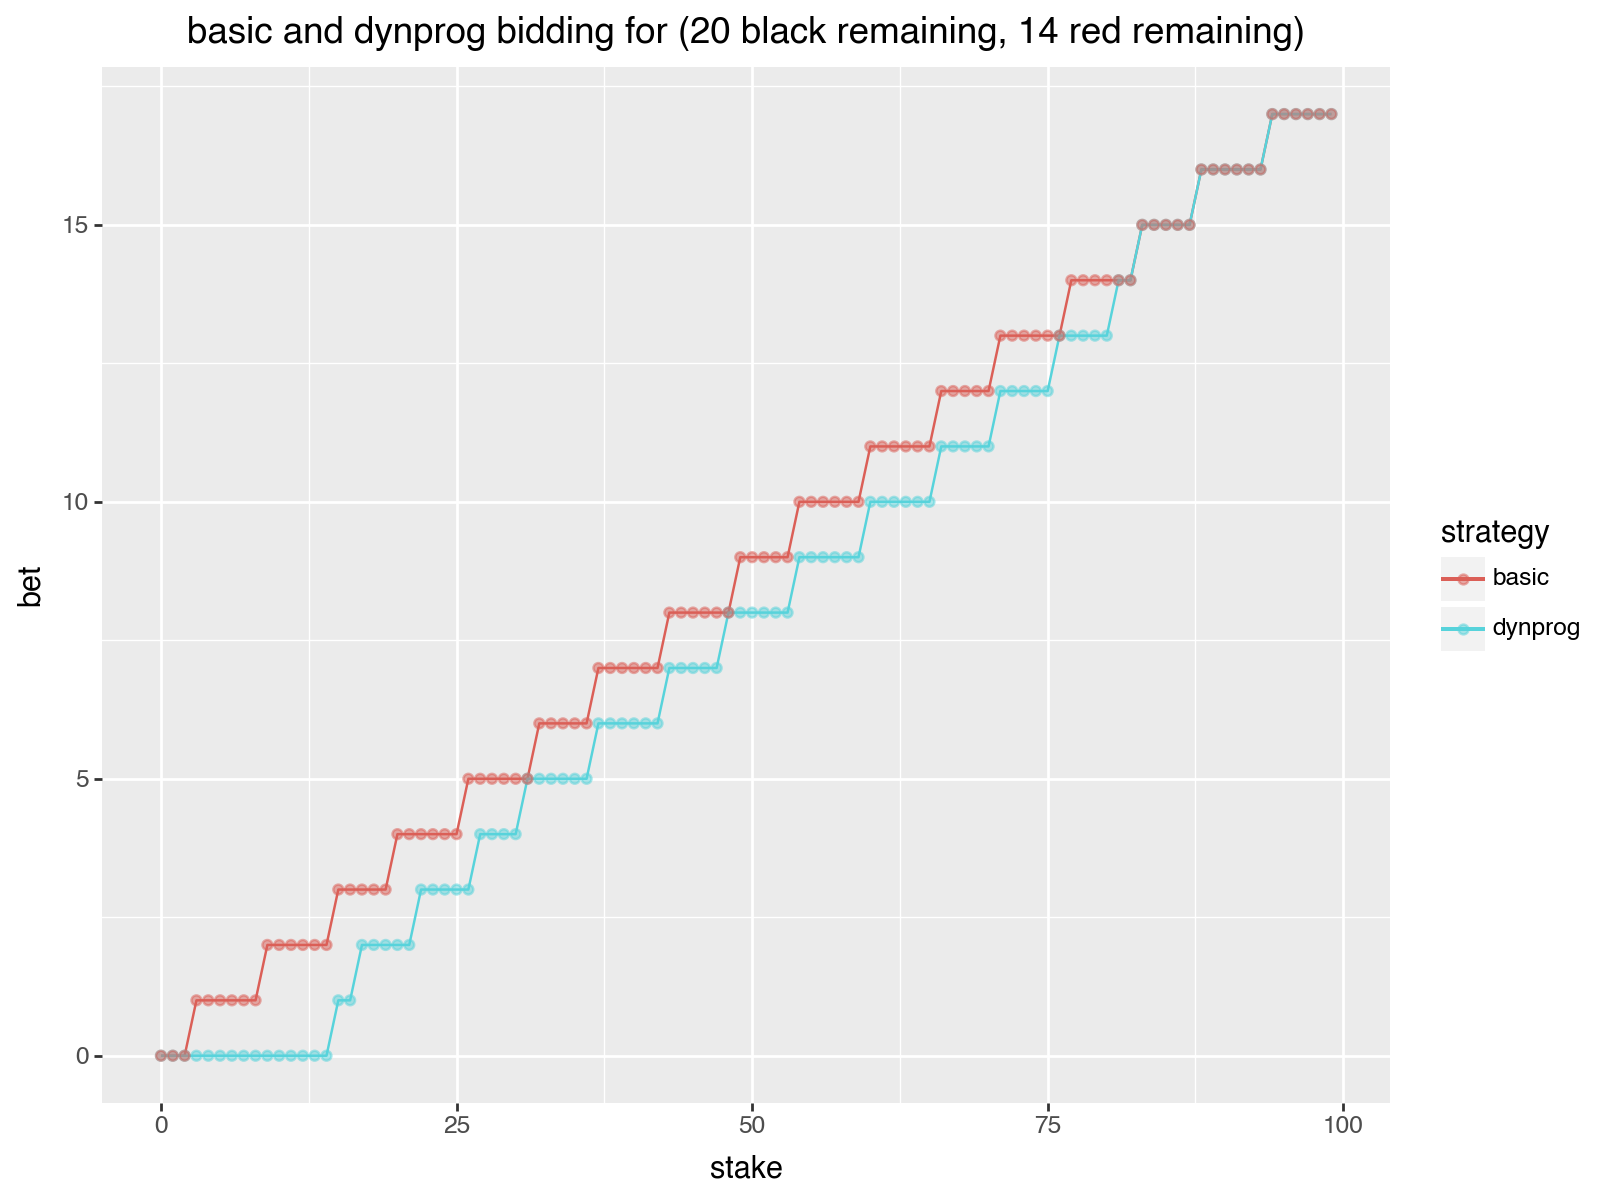

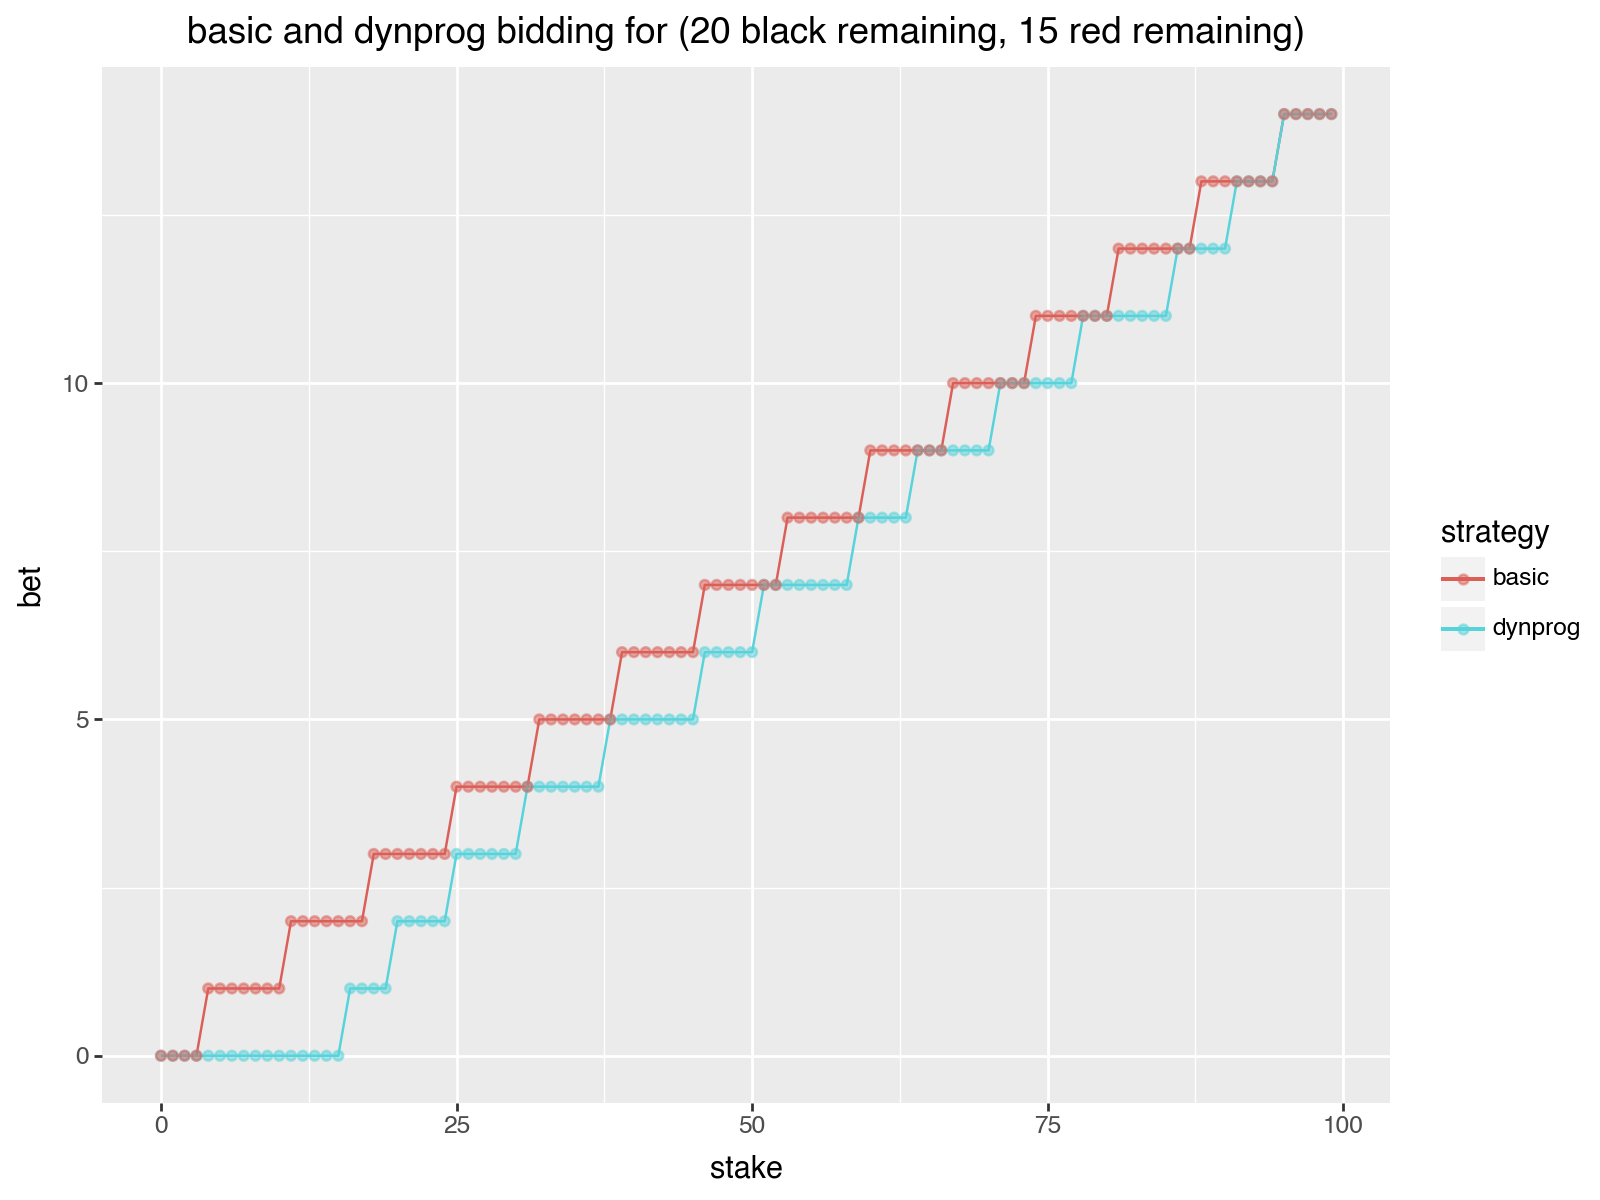

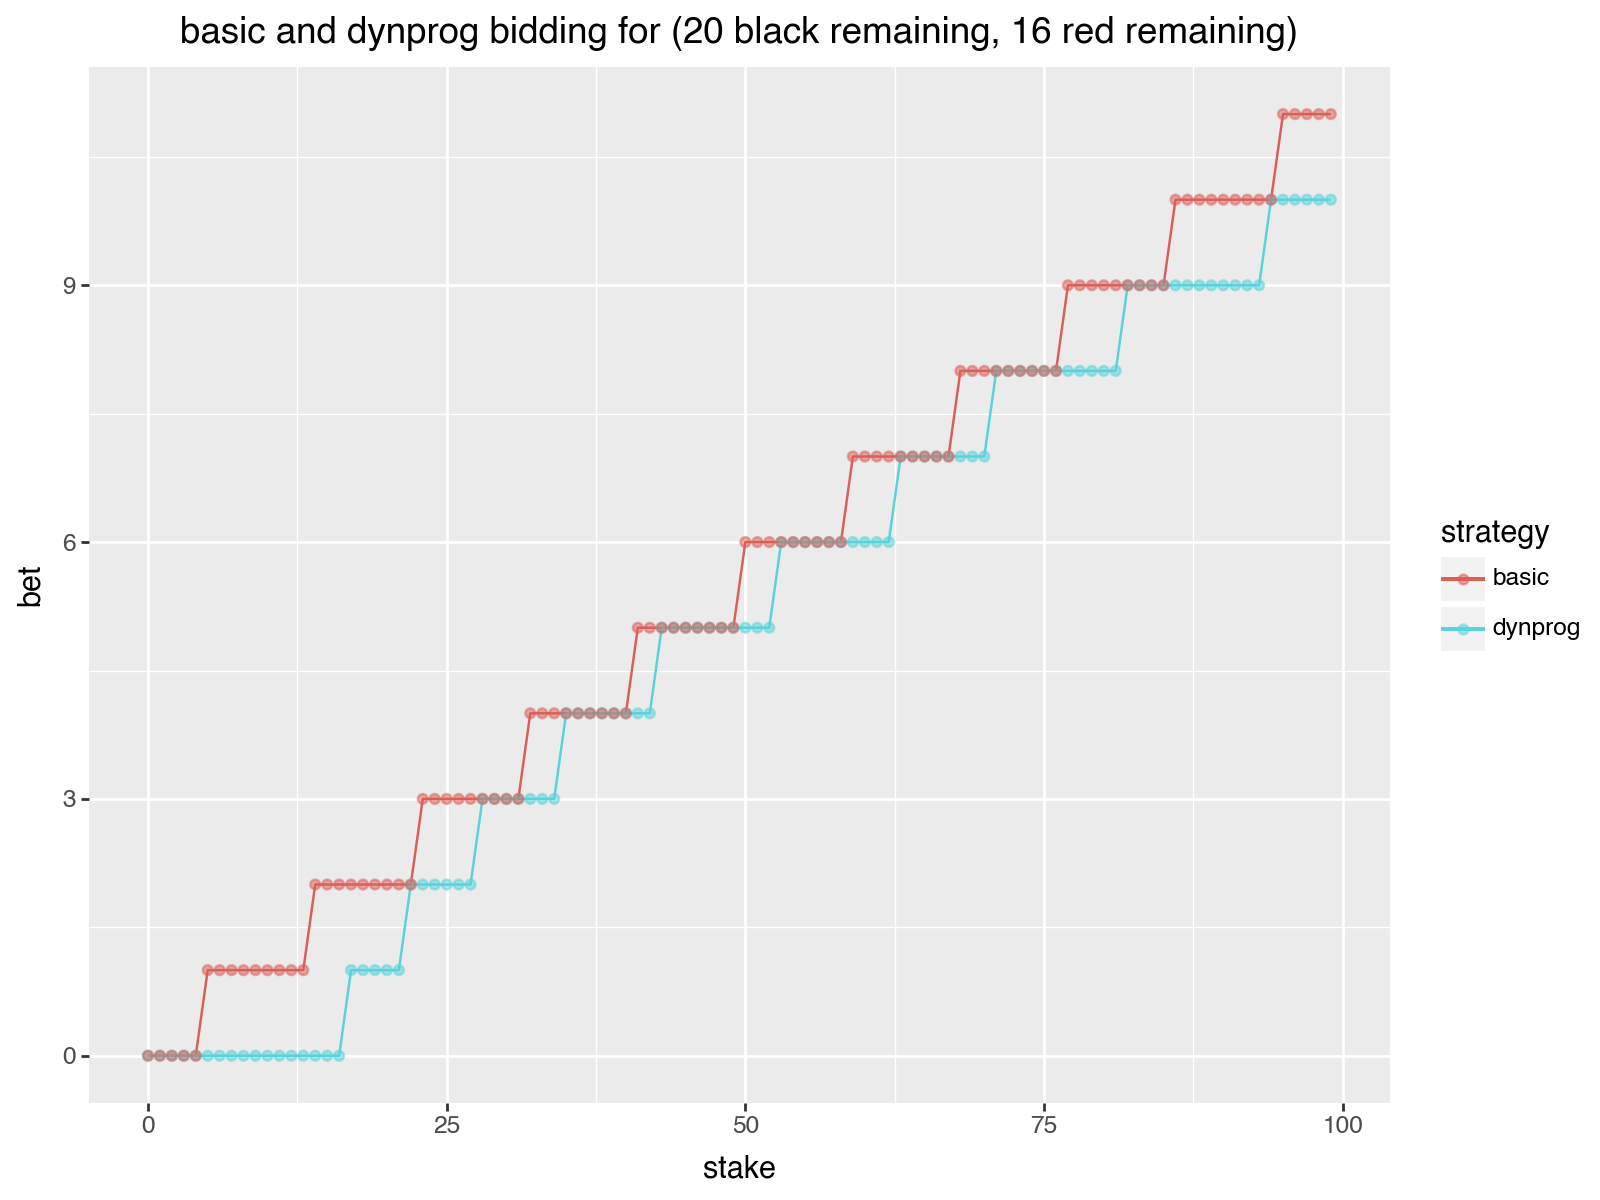

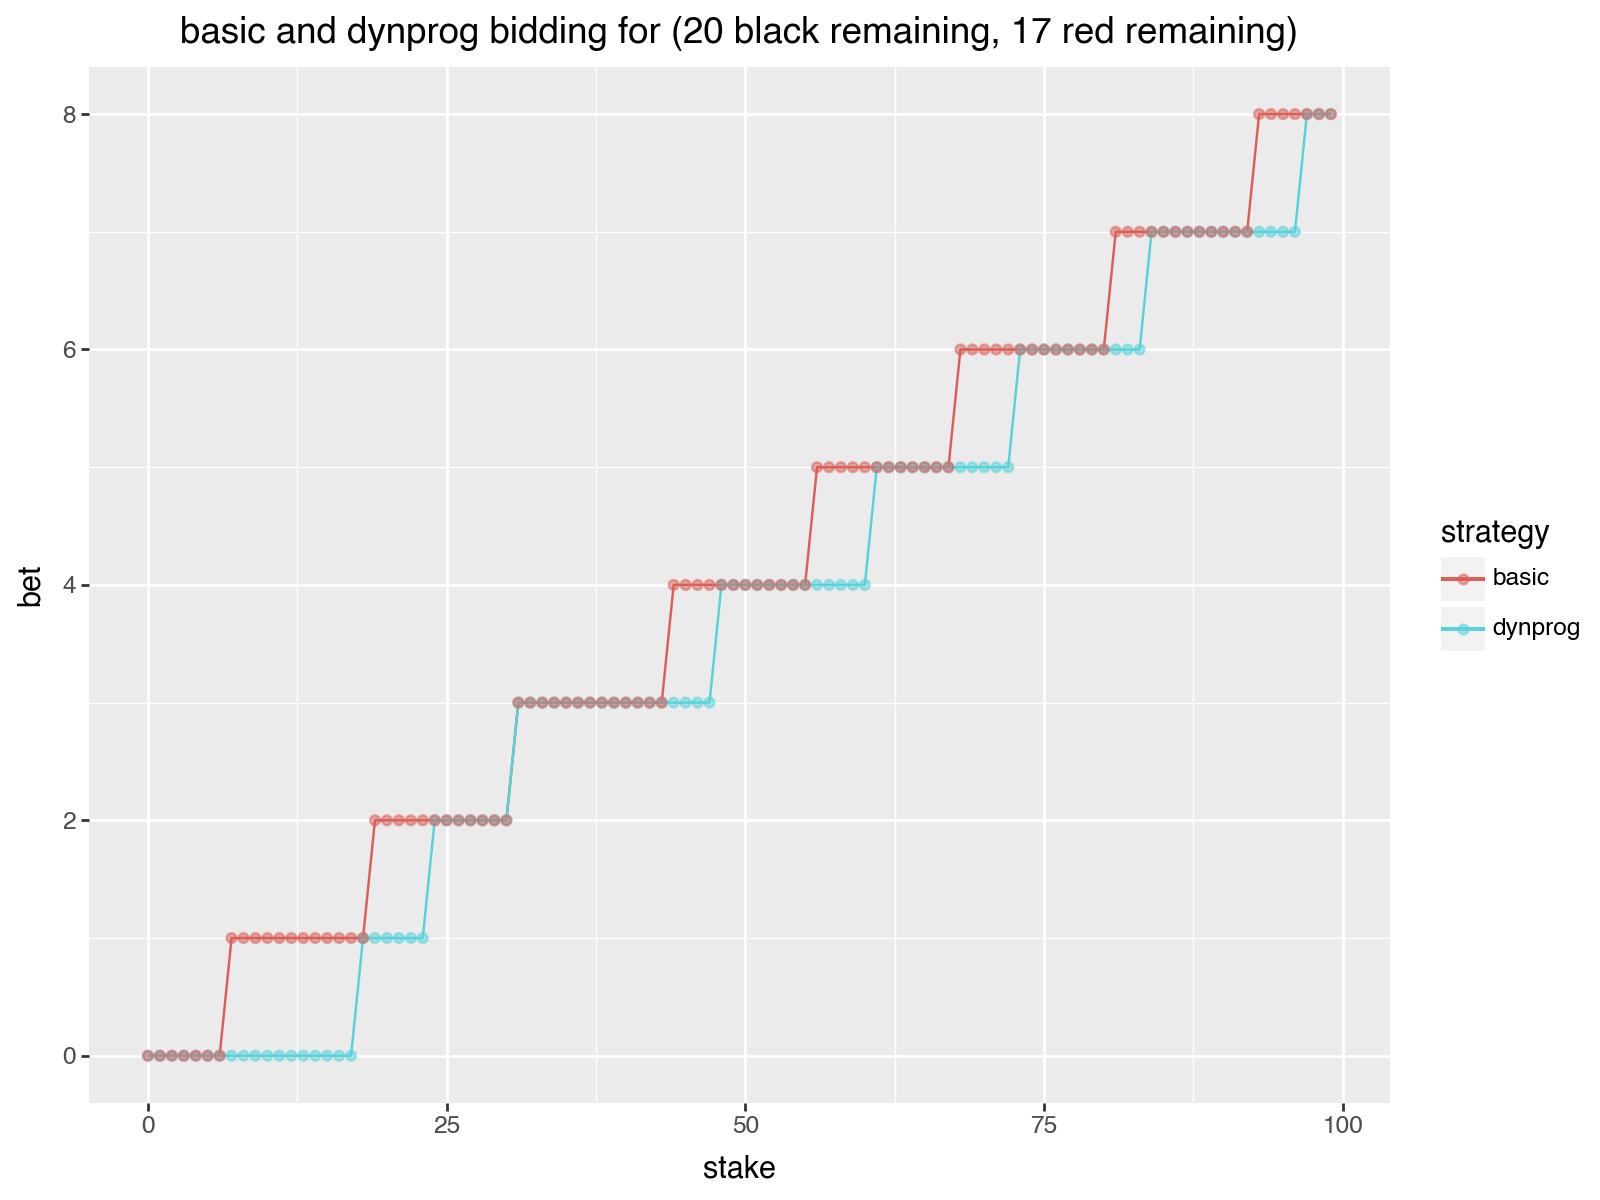

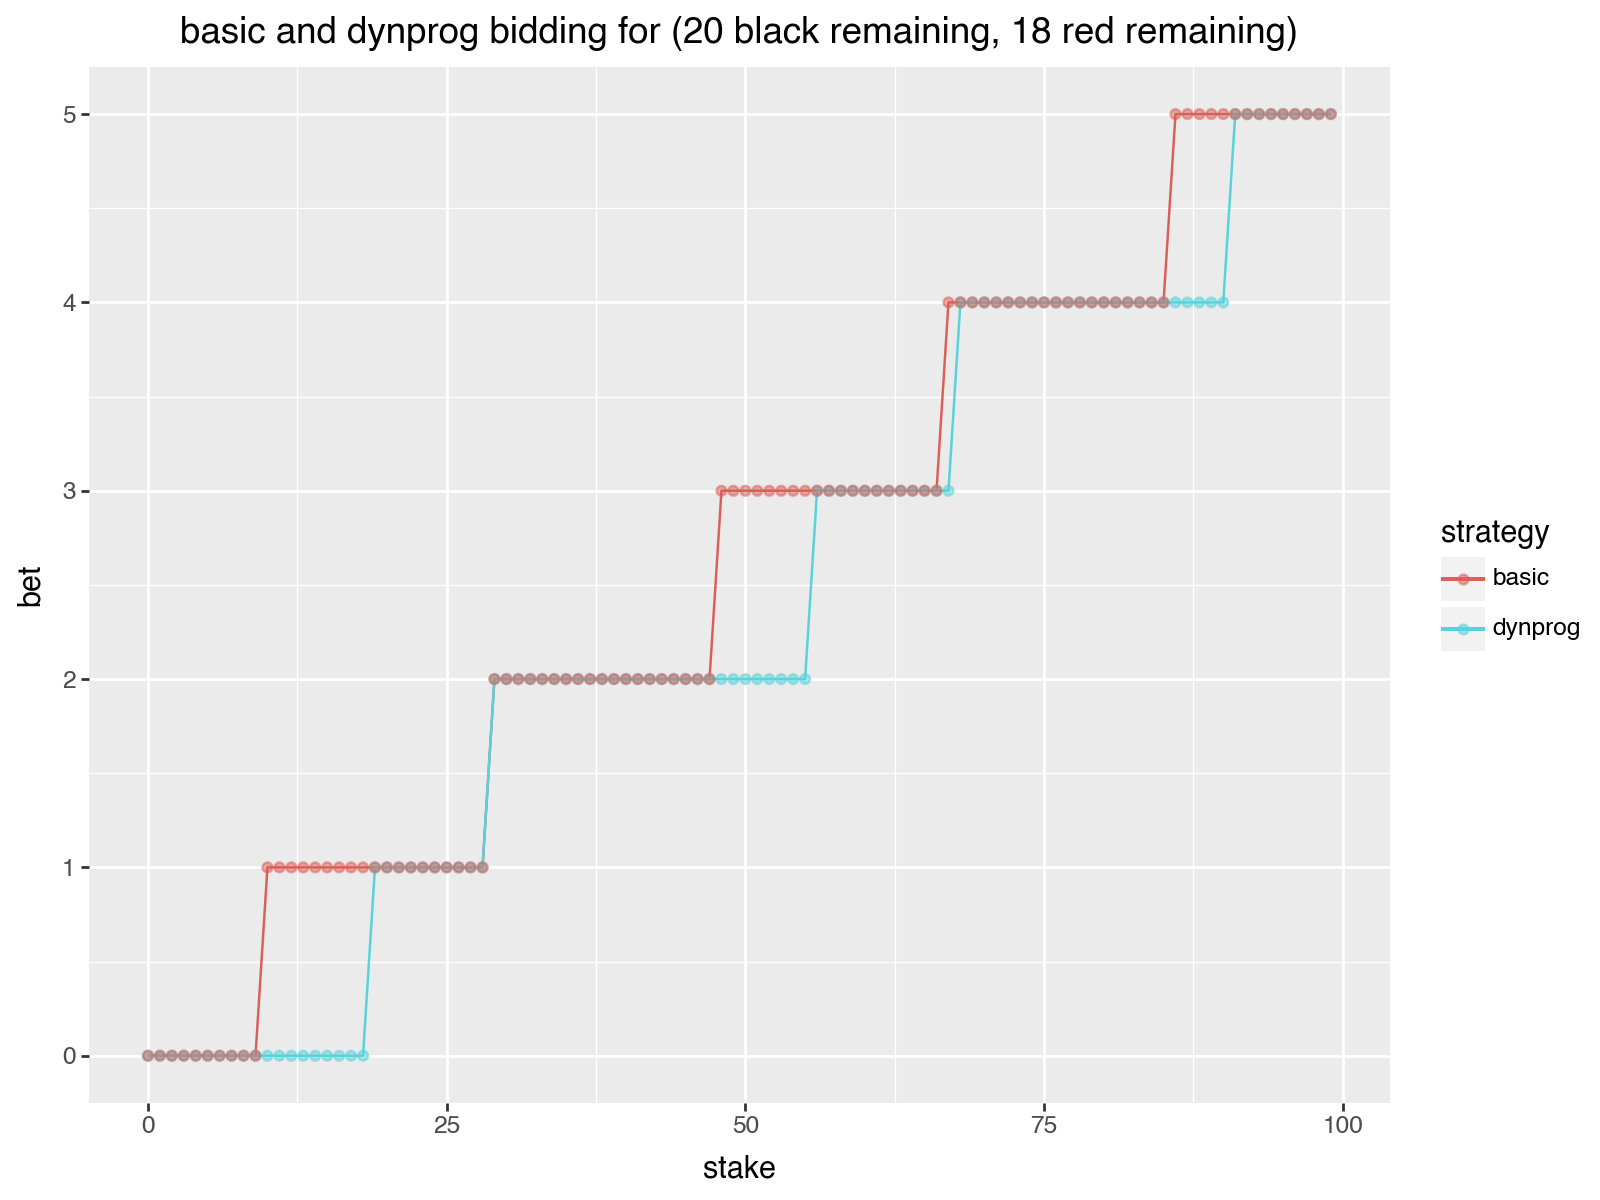

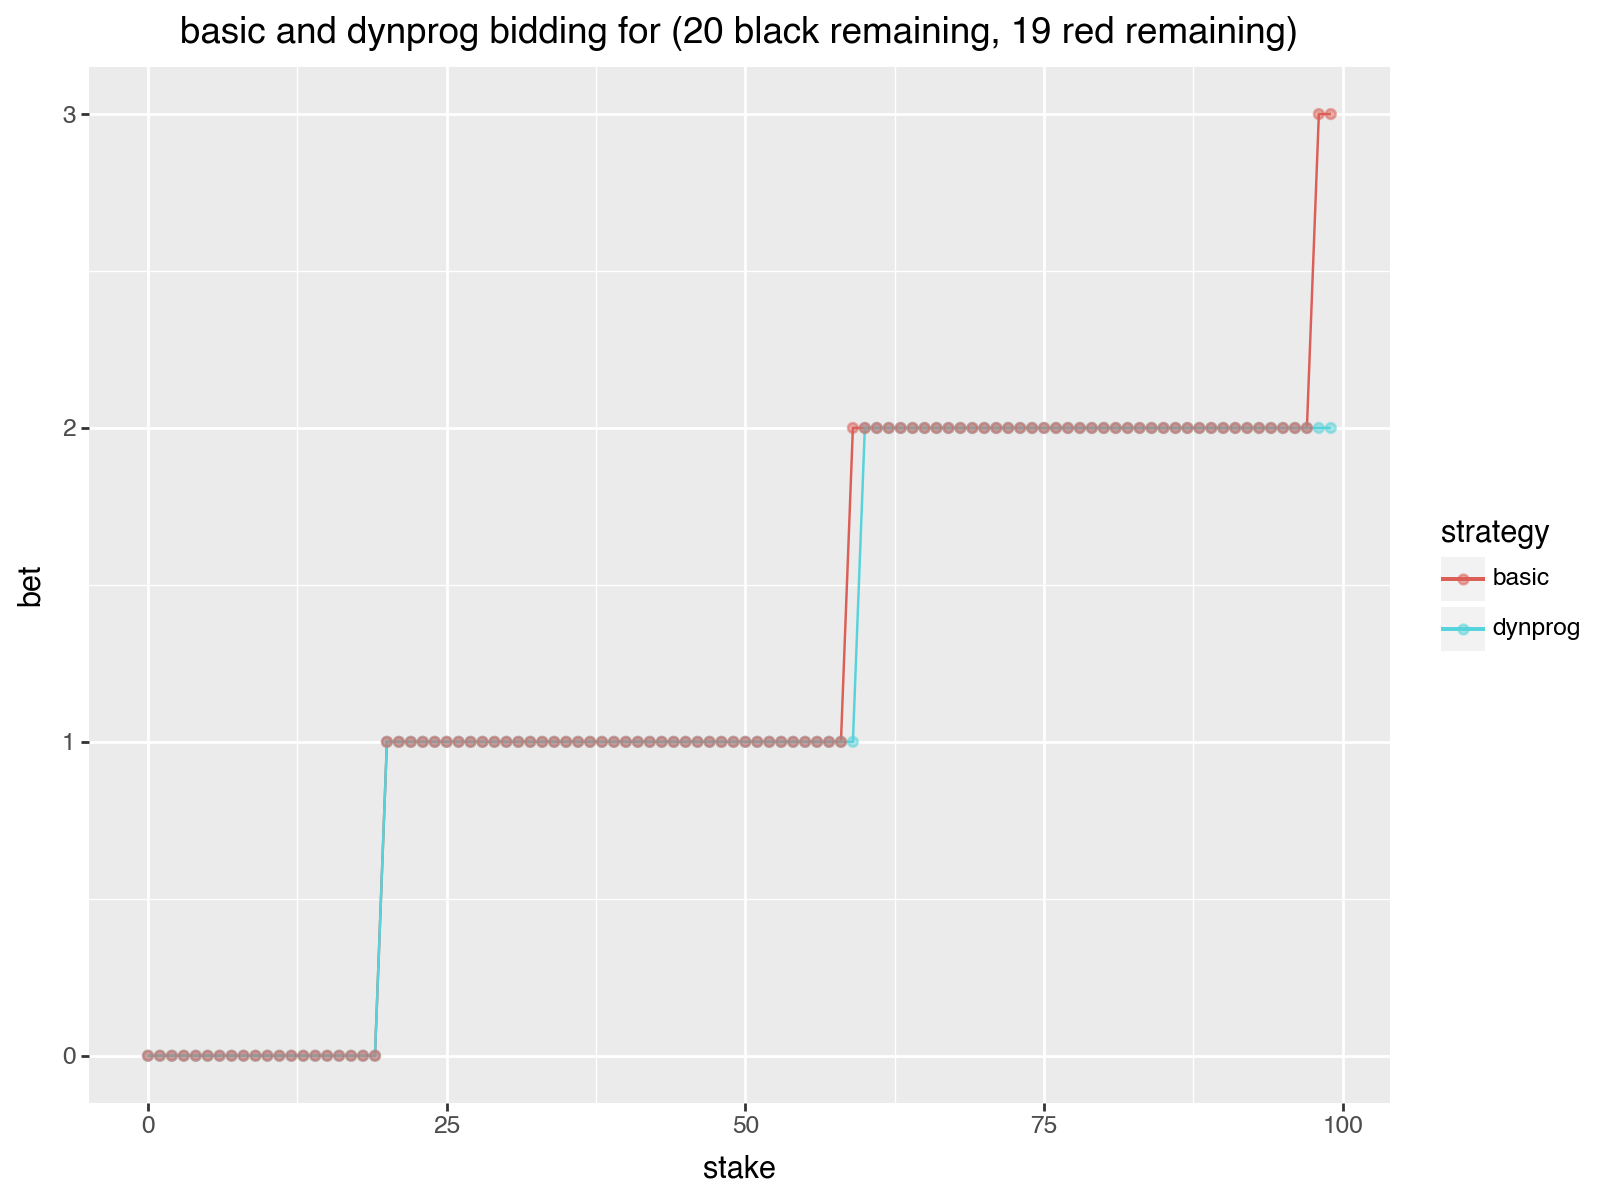

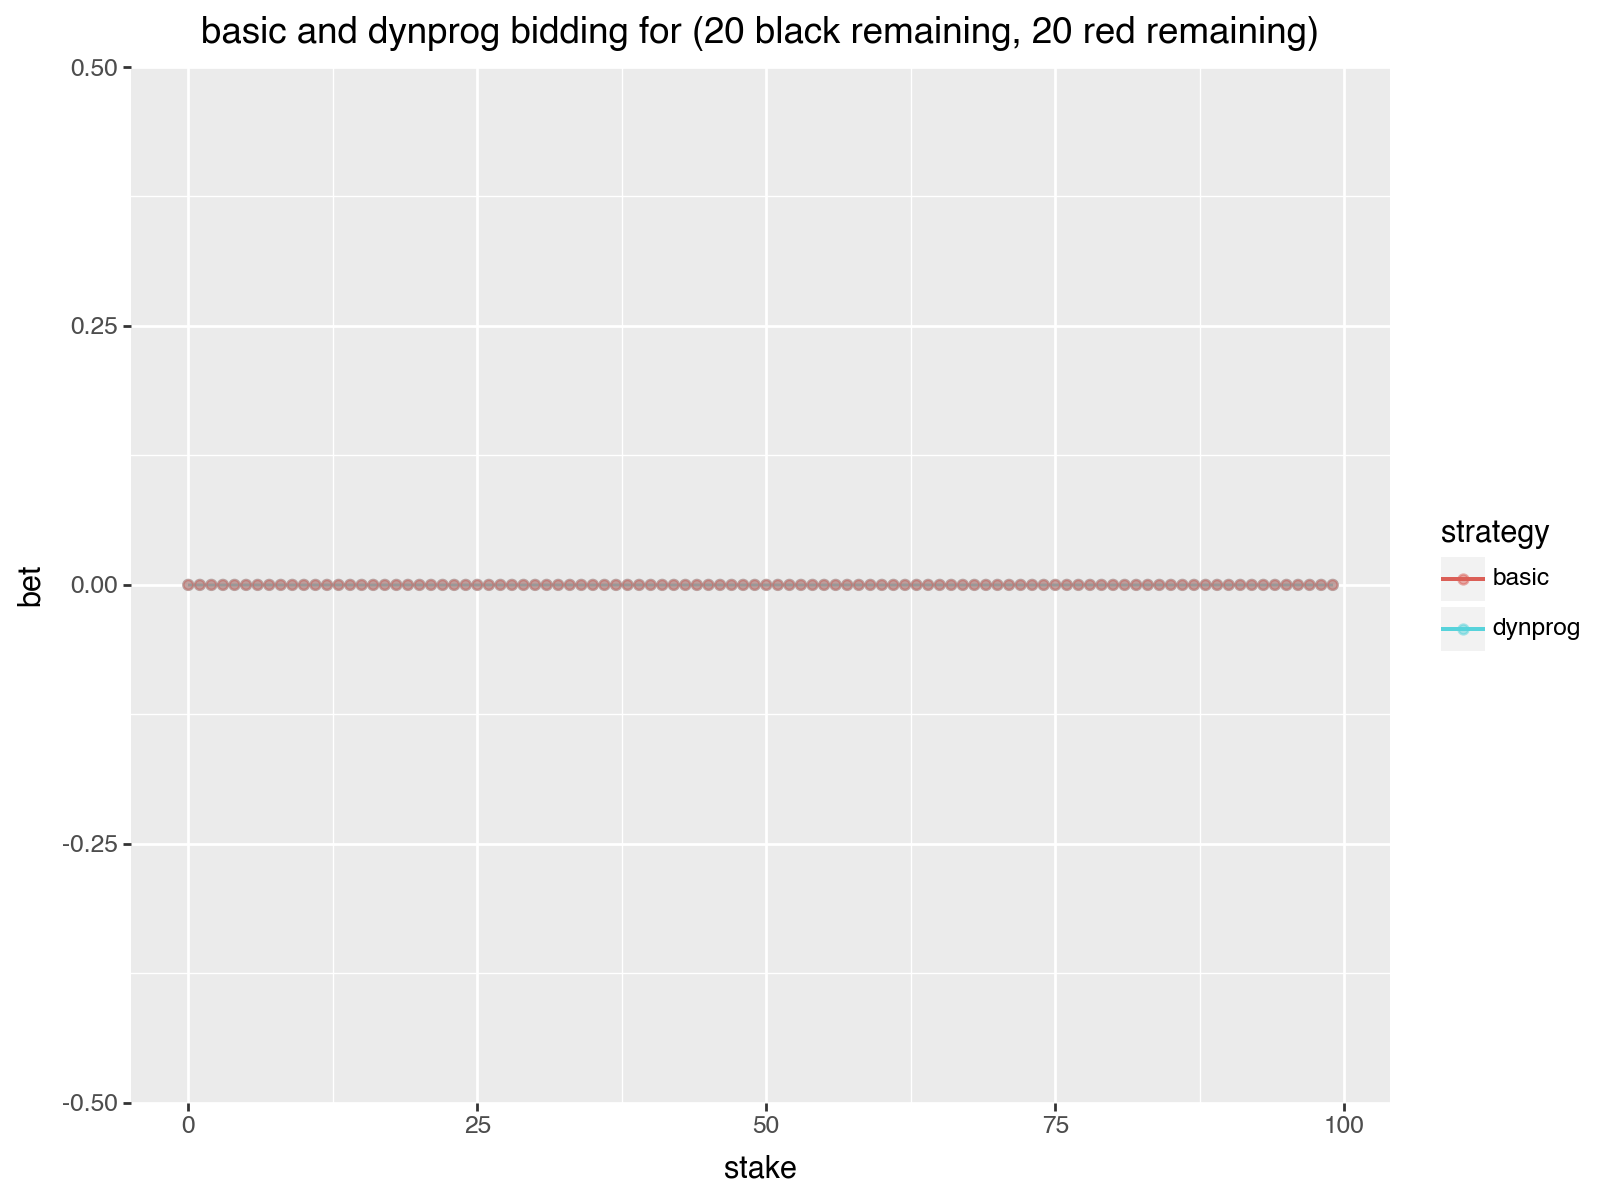

In [50]:
for i in range(21):
    display(plot_comparative_strategies(20, i))